# Data exploration of the HDFS system

## 1. Importing relevant stuff

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

Loading the datasets ['anomaly_label.csv','Event_occurrence_matrix.csv','Event_traces.csv','HDFS.log_templates.csv'] into a list


In [2]:
files = ['anomaly_label.csv','Event_occurrence_matrix.csv','Event_traces.csv','HDFS.log_templates.csv']

pandas_list = []

for file in files:
    pandas_list.append(pd.read_csv(file))



## 2. Exploring dataset and the relevant relations

#### 2.1 Dataset headers and shape

In [3]:
for co in range(len(files)):
    print(files[co])
    print(pandas_list[co].head())

anomaly_label.csv
                    BlockId    Label
0  blk_-1608999687919862906   Normal
1   blk_7503483334202473044   Normal
2  blk_-3544583377289625738  Anomaly
3  blk_-9073992586687739851   Normal
4   blk_7854771516489510256   Normal
Event_occurrence_matrix.csv
                    BlockId    Label  Type  E1  E2   E3  E4  E5  E6  E7  ...  \
0  blk_-1608999687919862906  Success   NaN   0   0  203   0  10   7   0  ...   
1   blk_7503483334202473044  Success   NaN   0   2    1   0   3   0   0  ...   
2  blk_-3544583377289625738     Fail  21.0   0   0  203   0   3   0   0  ...   
3  blk_-9073992586687739851  Success   NaN   0   3    0   0   3   0   0  ...   
4   blk_7854771516489510256  Success   NaN   0   3    1  15   3   0   0  ...   

   E20  E21  E22  E23  E24  E25  E26  E27  E28  E29  
0    0   10    1   10    0    4   10    0    0    0  
1    0    3    1    3    0    0    3    0    0    0  
2    1    3    1    3    0    0    3    0    0    0  
3    0    3    1    3    0    0    

In [4]:
for co in range(len(files)):
    print(files[co])
    print(pandas_list[co].shape)

anomaly_label.csv
(575061, 2)
Event_occurrence_matrix.csv
(575061, 32)
Event_traces.csv
(575061, 6)
HDFS.log_templates.csv
(29, 2)


In [5]:
for co in range(len(files)):
    print(files[co])
    print(pandas_list[co].info())

anomaly_label.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575061 entries, 0 to 575060
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   BlockId  575061 non-null  object
 1   Label    575061 non-null  object
dtypes: object(2)
memory usage: 8.8+ MB
None
Event_occurrence_matrix.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 575061 entries, 0 to 575060
Data columns (total 32 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   BlockId  575061 non-null  object 
 1   Label    575061 non-null  object 
 2   Type     16838 non-null   float64
 3   E1       575061 non-null  int64  
 4   E2       575061 non-null  int64  
 5   E3       575061 non-null  int64  
 6   E4       575061 non-null  int64  
 7   E5       575061 non-null  int64  
 8   E6       575061 non-null  int64  
 9   E7       575061 non-null  int64  
 10  E8       575061 non-null  int64  
 11  E9       575061 non-null

In [7]:
for co in range(len(files)):
    print(files[co])
    print(pandas_list[co].describe())

anomaly_label.csv
                         BlockId   Label
count                     575061  575061
unique                    575061       2
top     blk_-9128742458709757181  Normal
freq                           1  558223
Event_occurrence_matrix.csv
               Type             E1             E2             E3  \
count  16838.000000  575061.000000  575061.000000  575061.000000   
mean       9.375638       0.000017       0.208736       0.745531   
std       11.344260       0.005897       0.580644       2.517178   
min        0.000000       0.000000       0.000000       0.000000   
25%        3.000000       0.000000       0.000000       0.000000   
50%        5.000000       0.000000       0.000000       0.000000   
75%        8.000000       0.000000       0.000000       0.000000   
max       31.000000       2.000000       4.000000     203.000000   

                  E4             E5             E6             E7  \
count  575061.000000  575061.000000  575061.000000  575061.000000  

#### 2.2 Check for Null values in dataset

In [6]:
for co in range(len(files)):
    print(files[co])
    print(pandas_list[co].isna().sum())


anomaly_label.csv
BlockId    0
Label      0
dtype: int64
Event_occurrence_matrix.csv
BlockId         0
Label           0
Type       558223
E1              0
E2              0
E3              0
E4              0
E5              0
E6              0
E7              0
E8              0
E9              0
E10             0
E11             0
E12             0
E13             0
E14             0
E15             0
E16             0
E17             0
E18             0
E19             0
E20             0
E21             0
E22             0
E23             0
E24             0
E25             0
E26             0
E27             0
E28             0
E29             0
dtype: int64
Event_traces.csv
BlockId              0
Label                0
Type            558223
Features             0
TimeInterval         0
Latency              0
dtype: int64
HDFS.log_templates.csv
EventId          0
EventTemplate    0
dtype: int64


## 2.3 Isolating one of the Dataframes to be reviewed and explored

In [8]:
occ_df = pandas_list[1]

occ_df.head()

,BlockId,Label,Type,E1,E2,E3,E4,E5,E6,E7,...,E20,E21,E22,E23,E24,E25,E26,E27,E28,E29
0,blk_-1608999687919862906,Success,NaN,0,0,203,0,10,7,0,...,0,10,1,10,0,4,10,0,0,0
1,blk_7503483334202473044,Success,NaN,0,2,1,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
2,blk_-3544583377289625738,Fail,21.0,0,0,203,0,3,0,0,...,1,3,1,3,0,0,3,0,0,0
3,blk_-9073992586687739851,Success,NaN,0,3,0,0,3,0,0,...,0,3,1,3,0,0,3,0,0,0
4,blk_7854771516489510256,Success,NaN,0,3,1,15,3,0,0,...,0,3,1,3,0,0,3,0,0,0


In [9]:
print(occ_df.BlockId.nunique())
print(occ_df.Label.value_counts())

575061
Label
Success    558223
Fail        16838
Name: count, dtype: int64


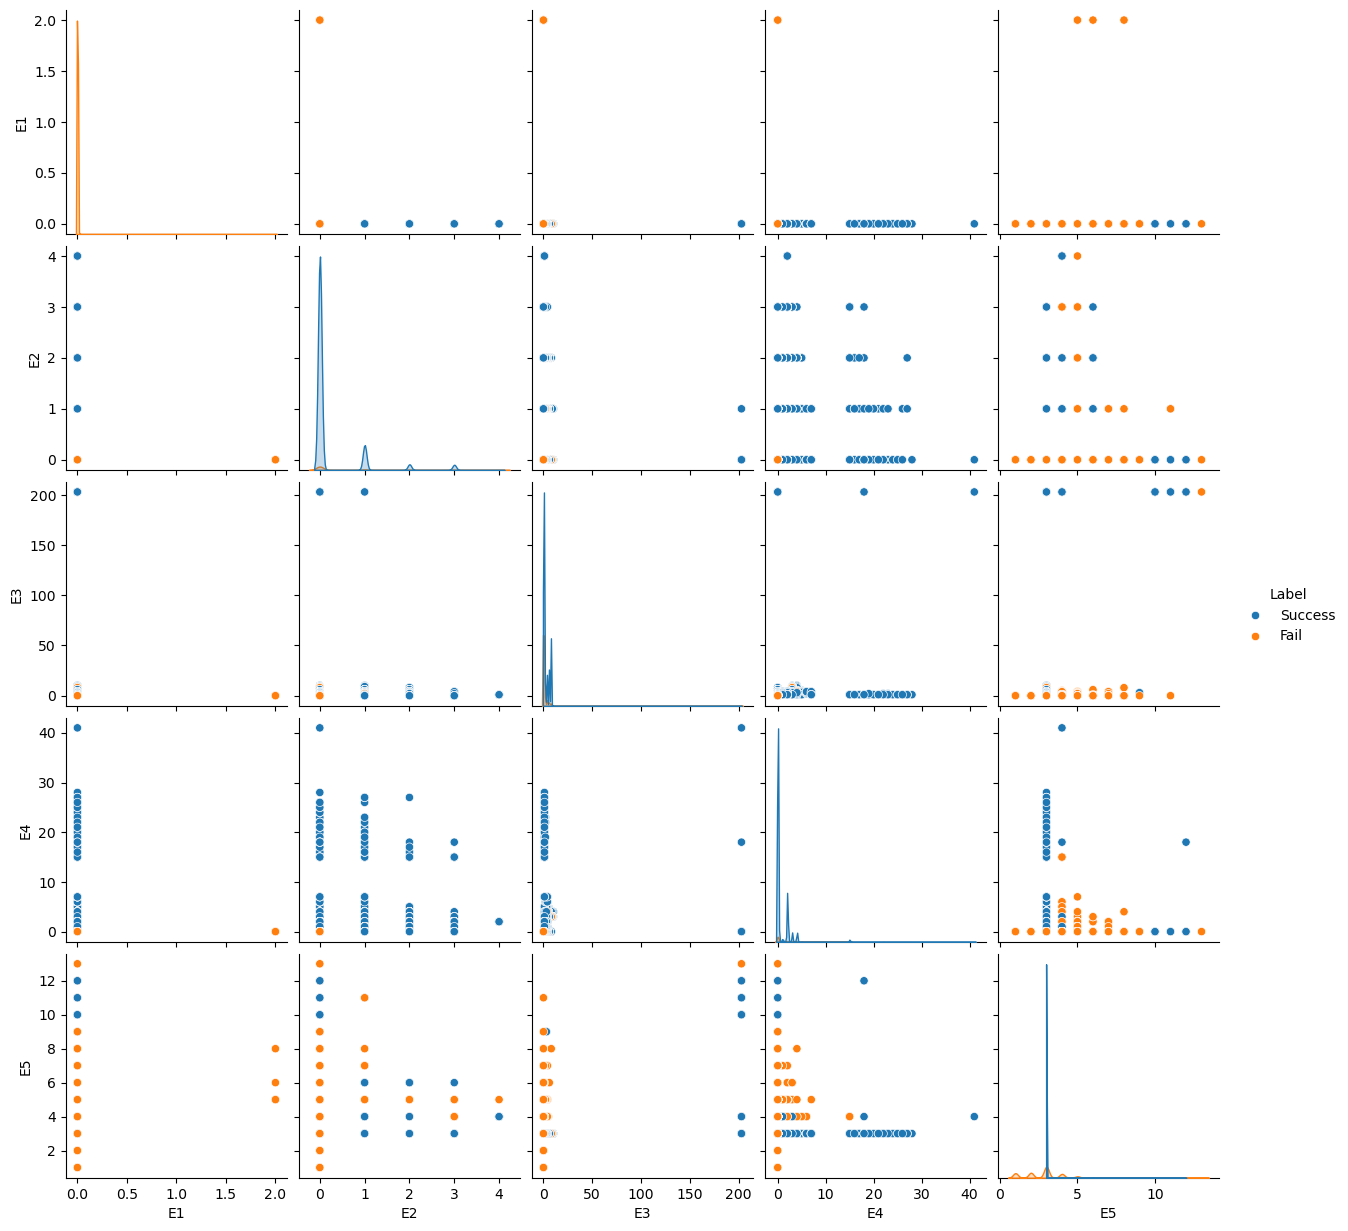

In [10]:
sns.pairplot(occ_df[['E1', 'E2', 'E3', 'E4', 'E5', 'Label']], hue='Label')
plt.show()

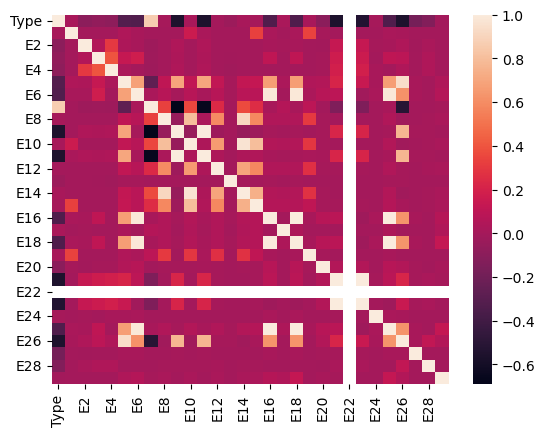

In [11]:
sns.heatmap(occ_df.corr(numeric_only=True))
plt.show()

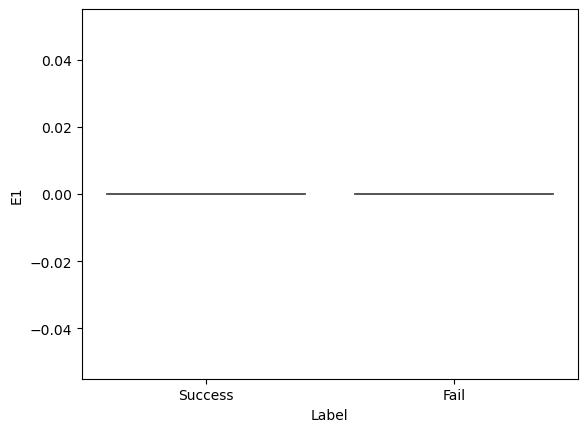

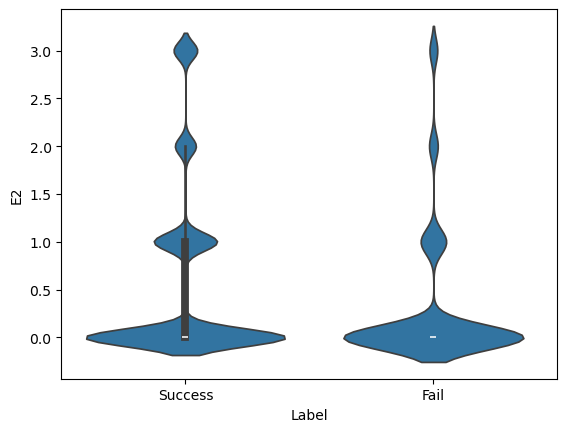

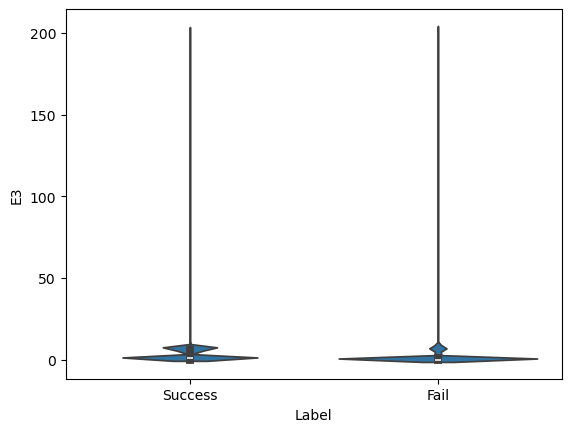

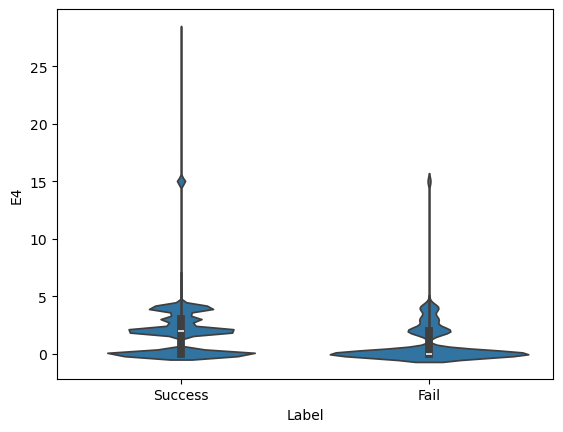

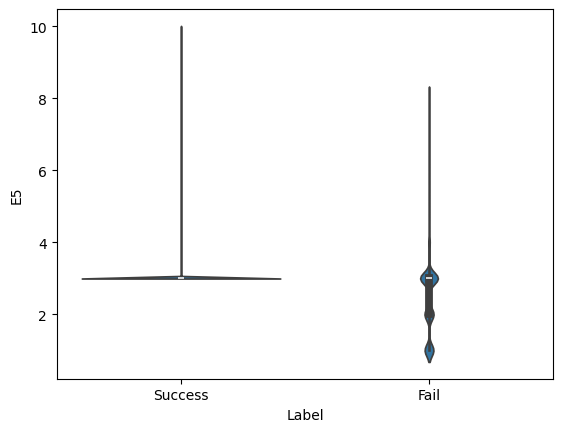

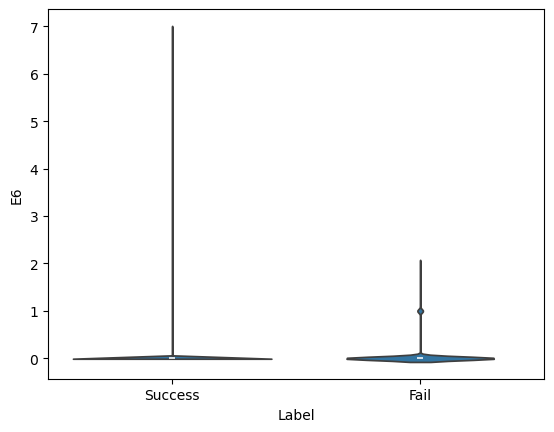

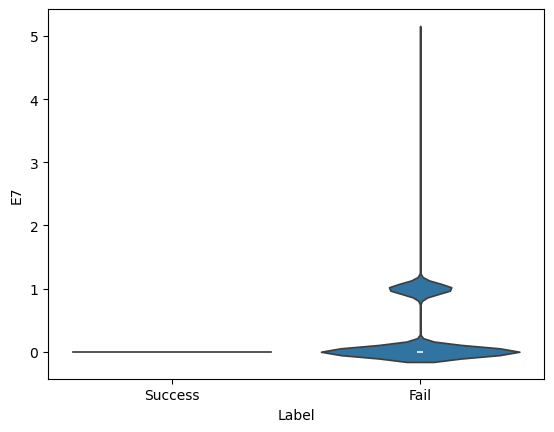

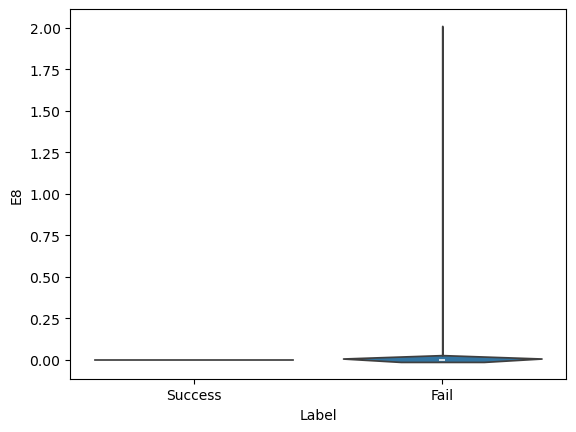

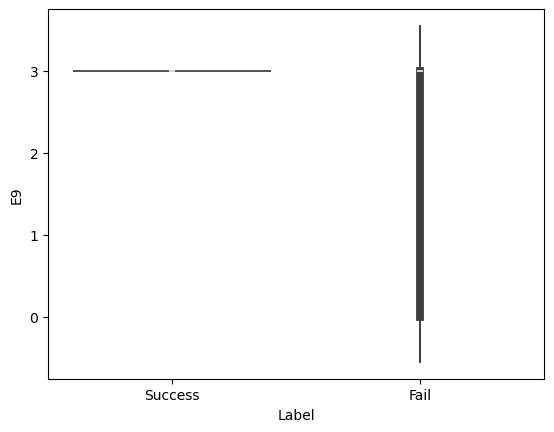

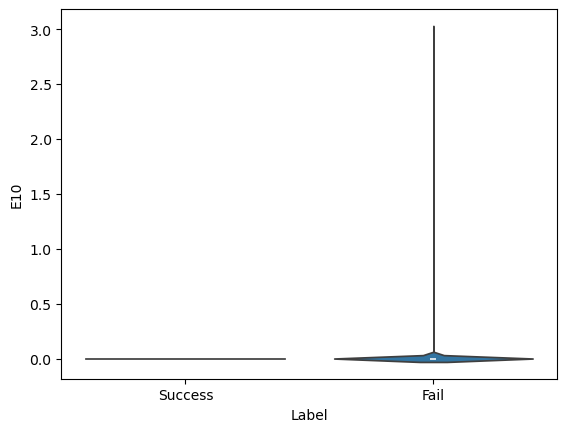

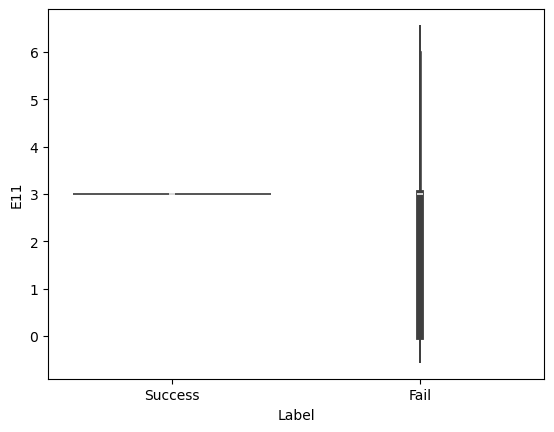

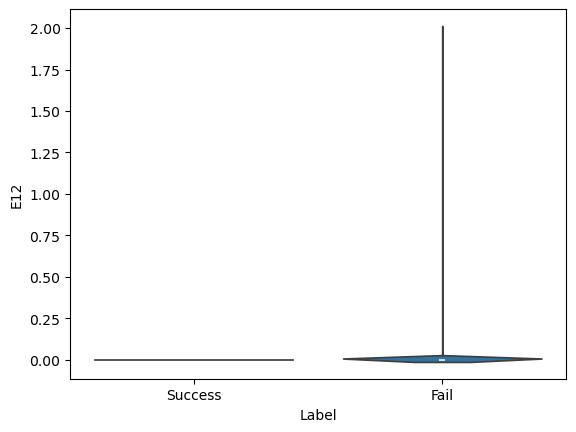

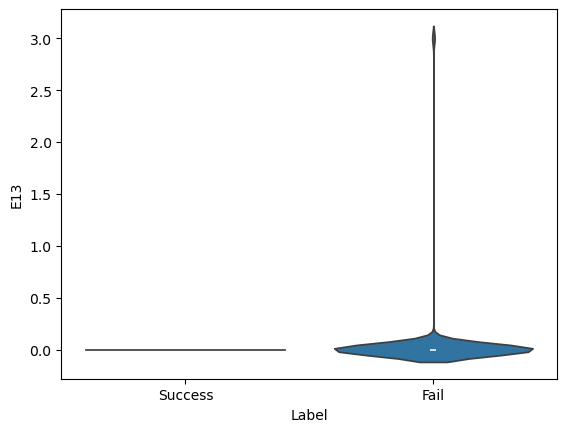

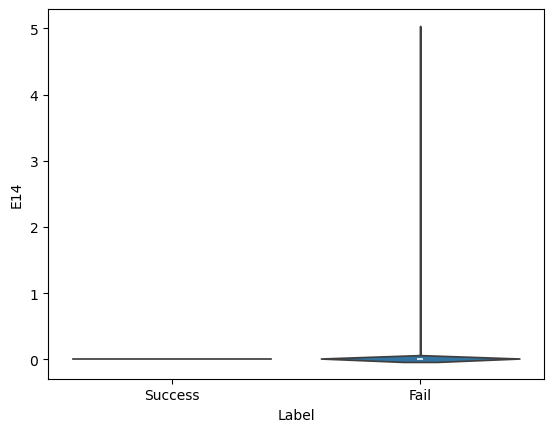

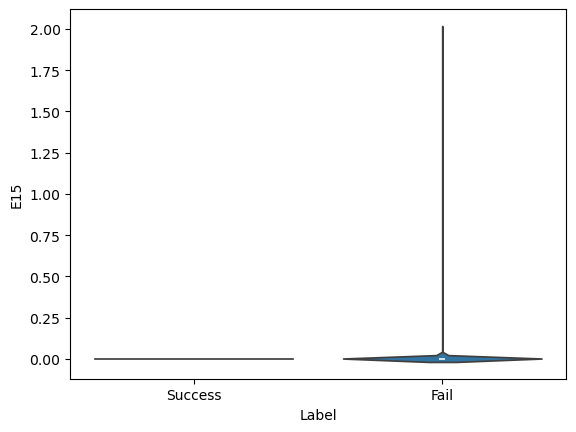

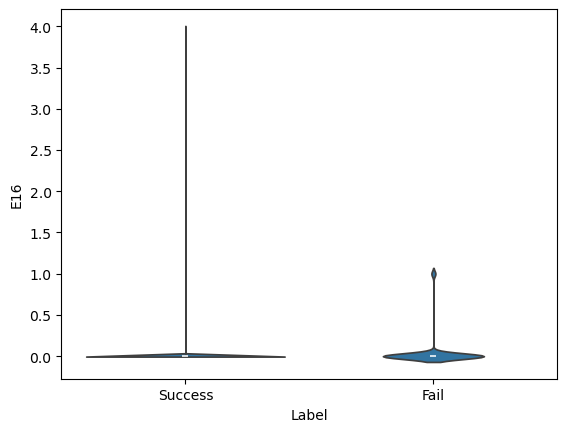

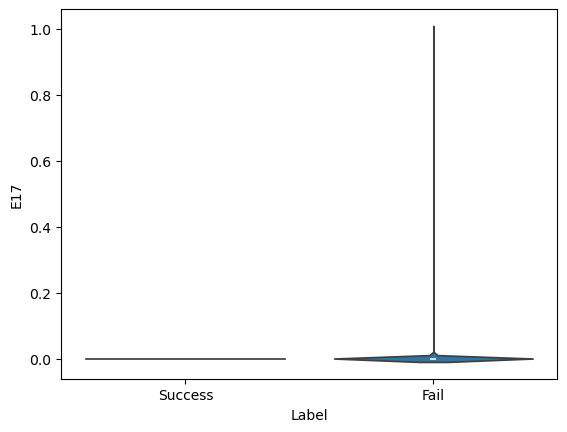

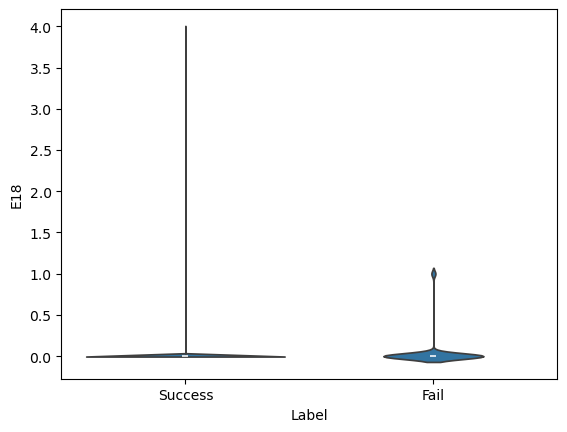

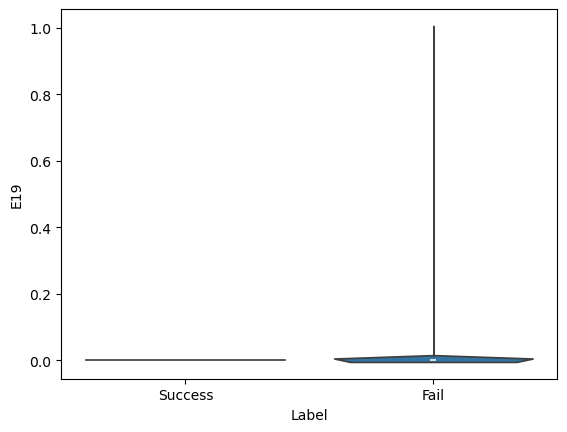

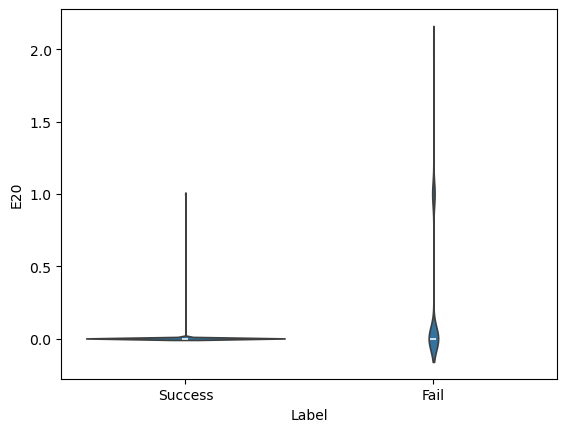

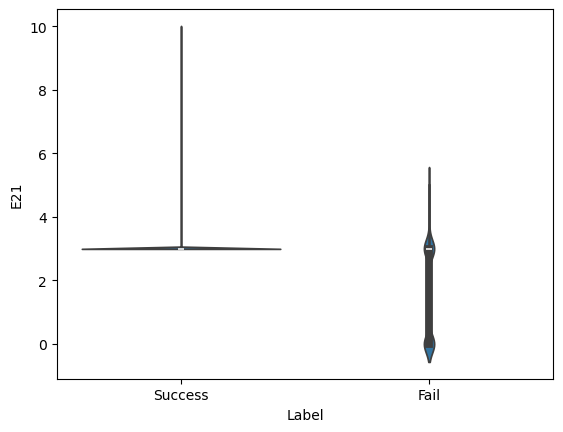

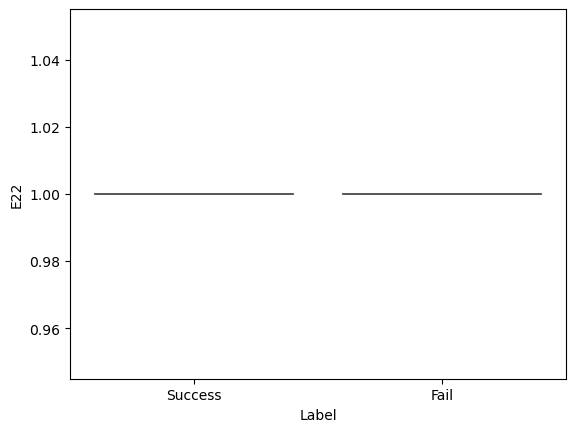

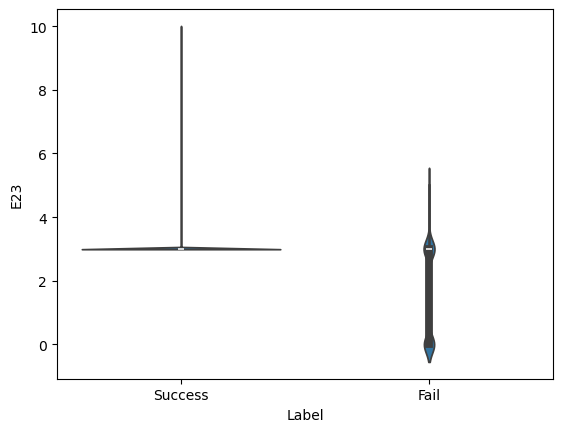

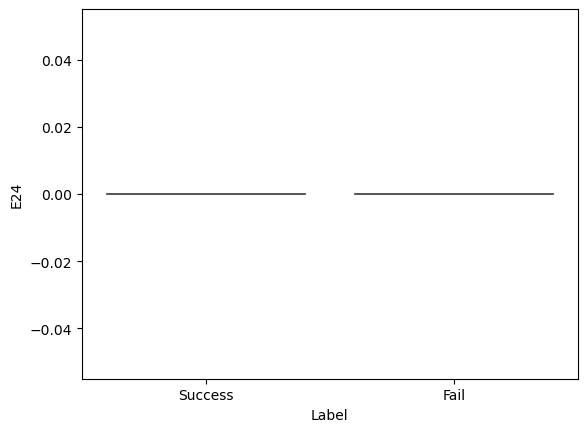

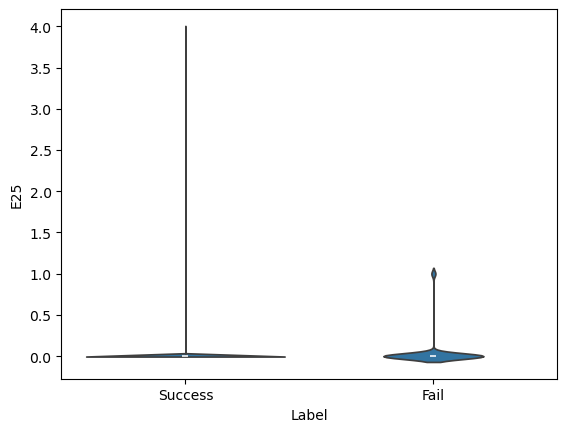

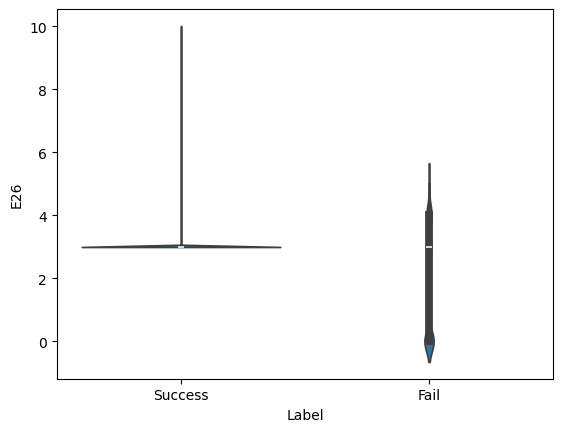

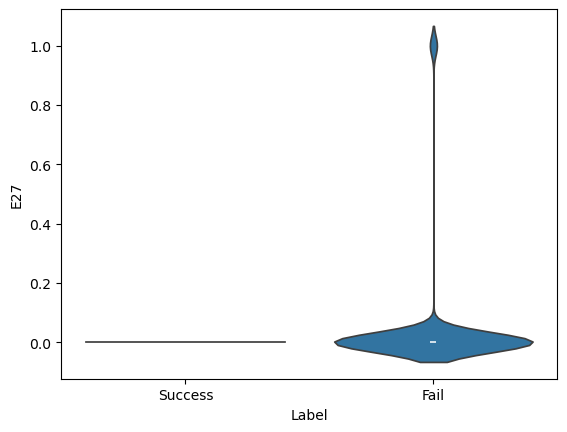

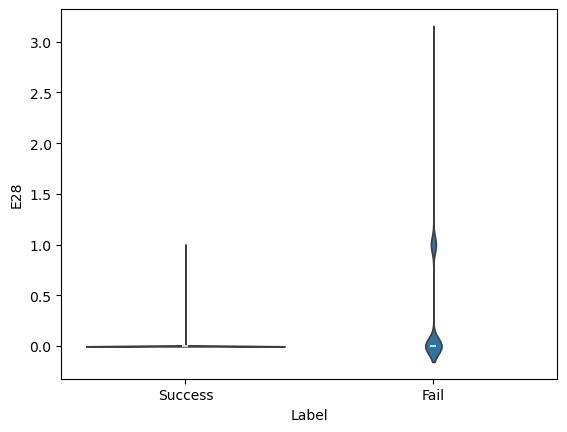

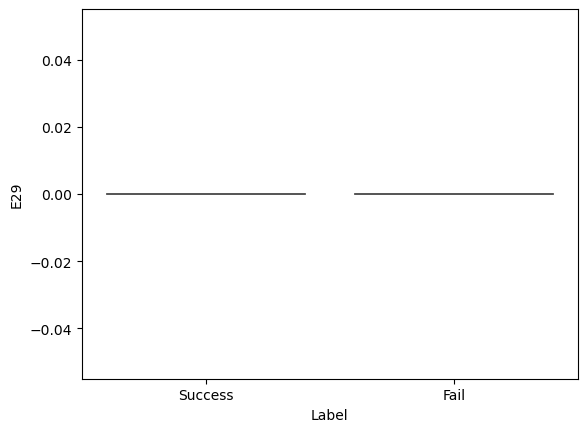

In [12]:
# Limiting the size of the data since process takes too long to load

v = occ_df.head(100000)

for col in v.drop(['BlockId','Label','Type'], axis=1).columns:
    sns.violinplot(data=v,x='Label',y=col)
    plt.show()

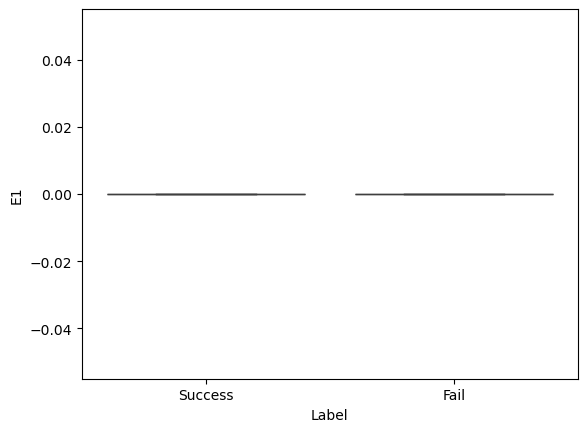

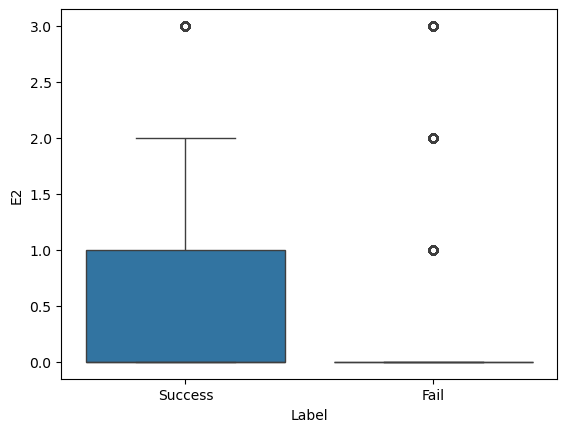

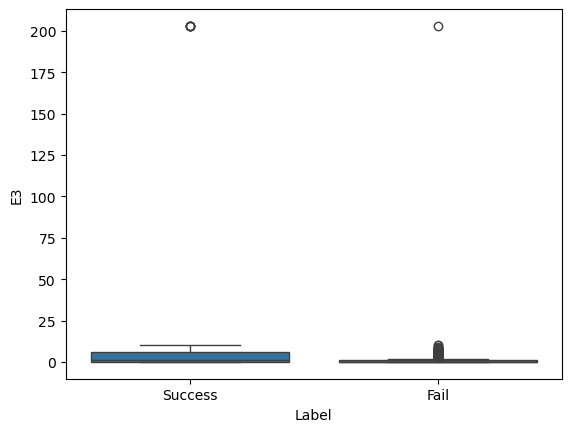

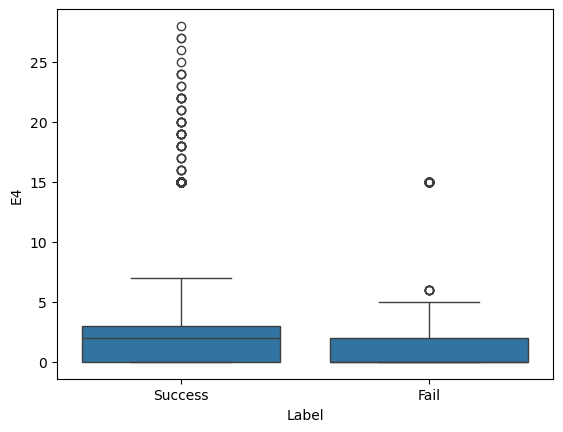

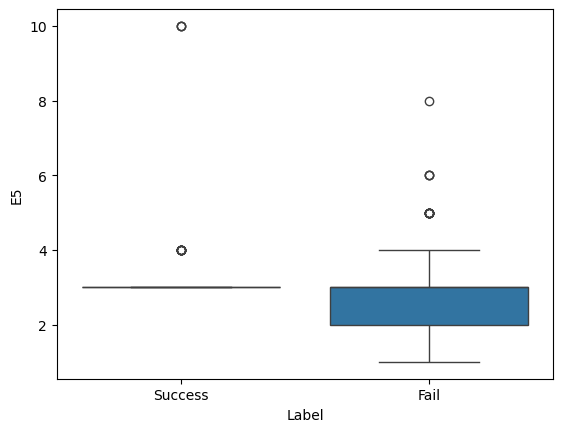

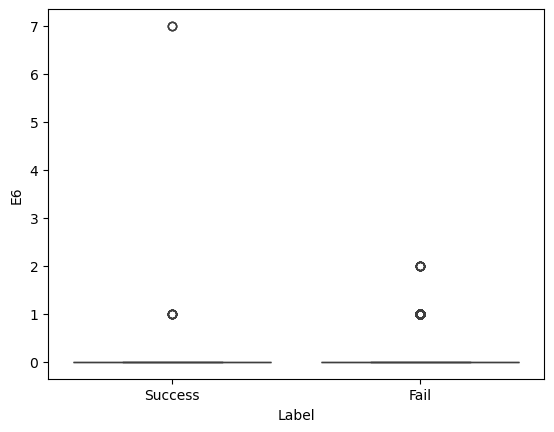

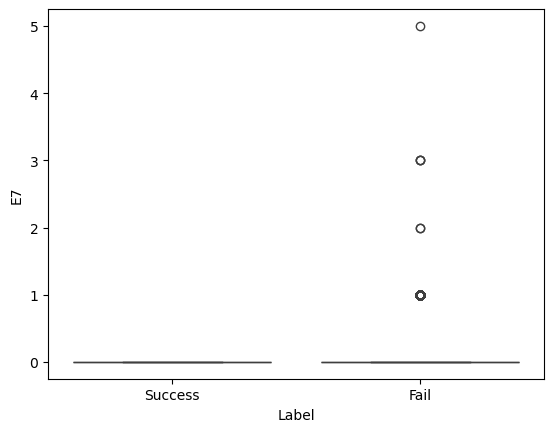

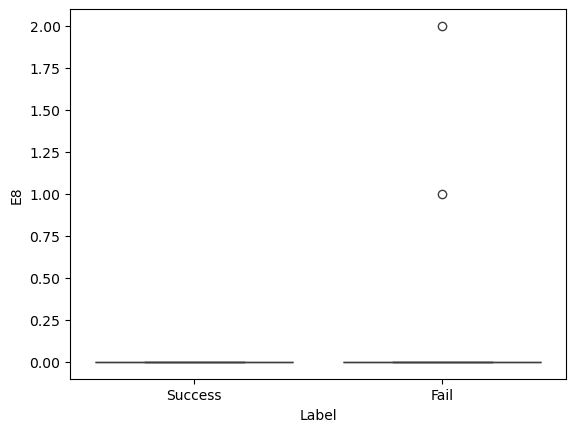

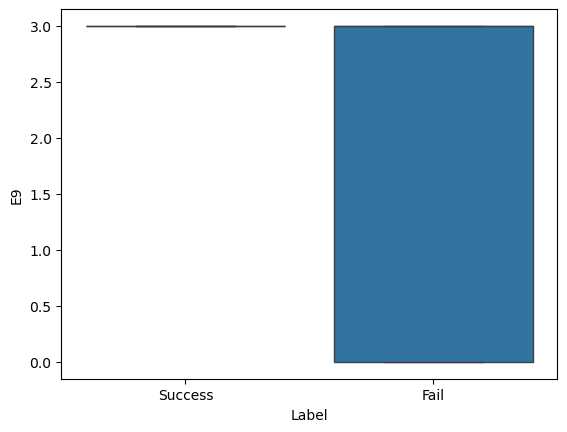

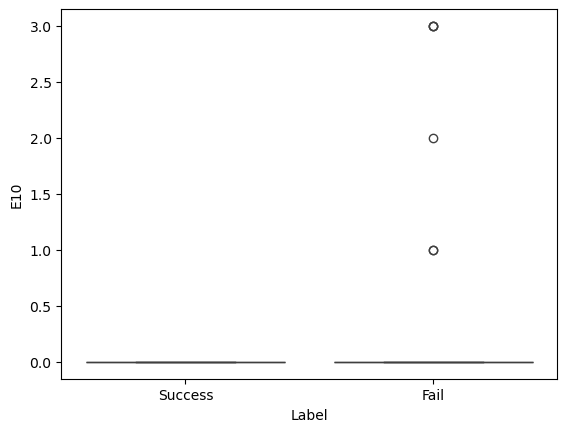

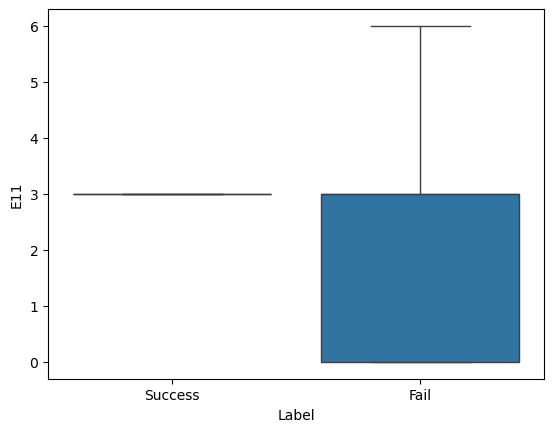

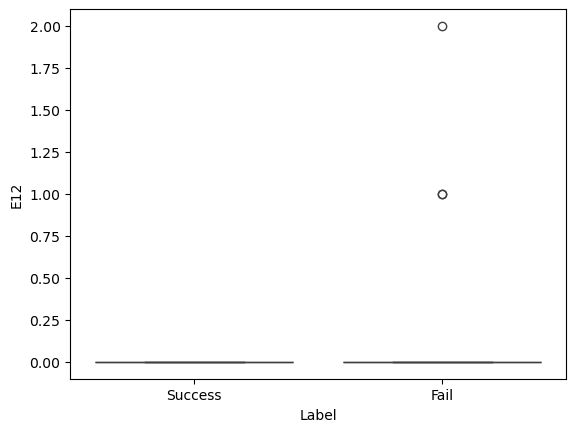

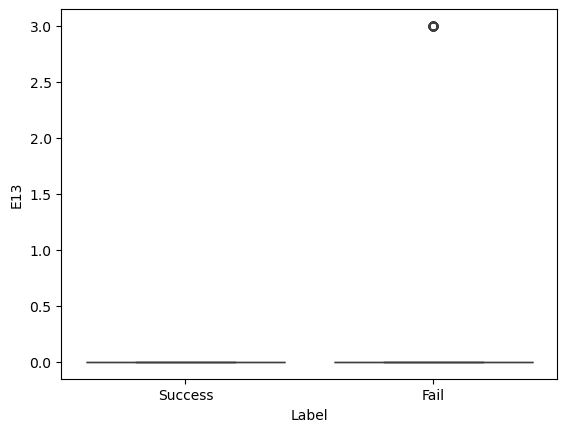

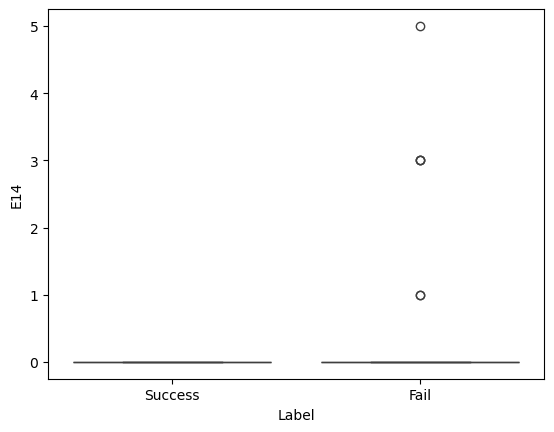

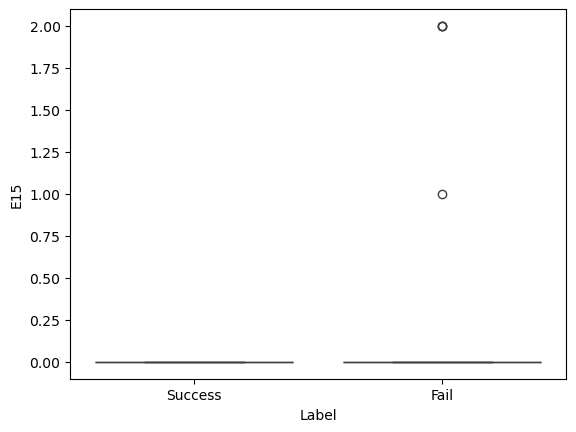

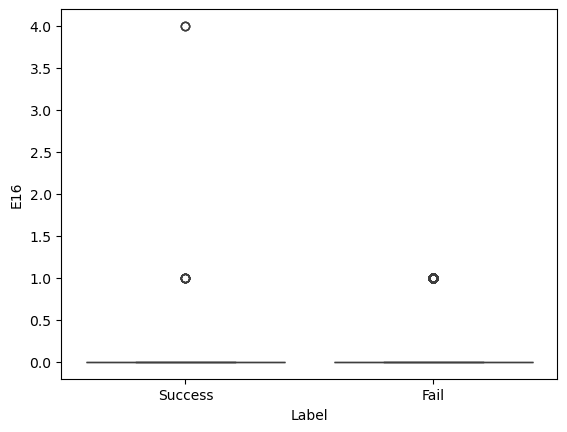

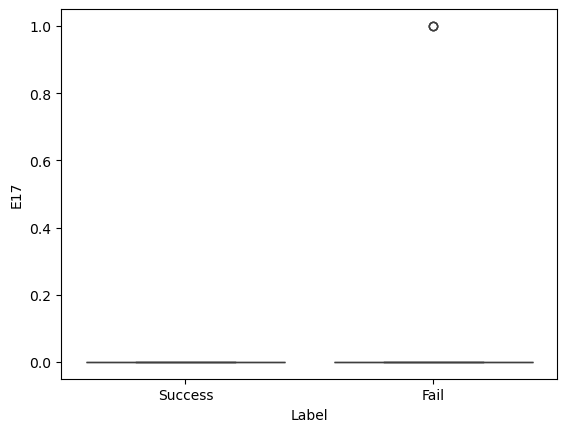

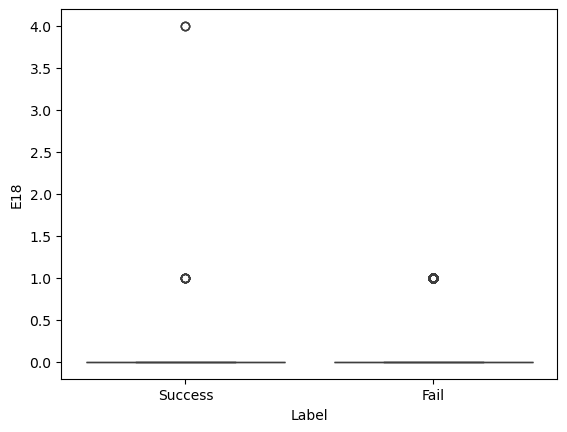

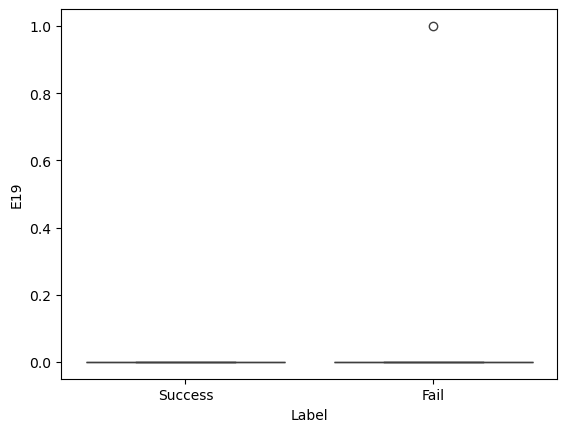

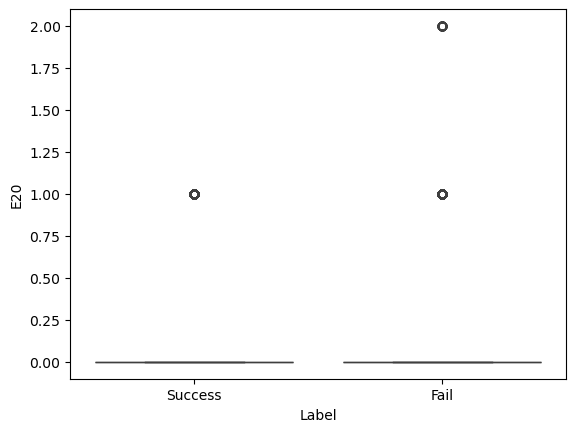

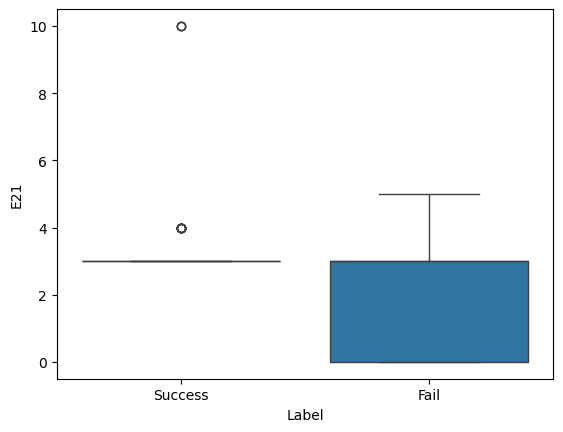

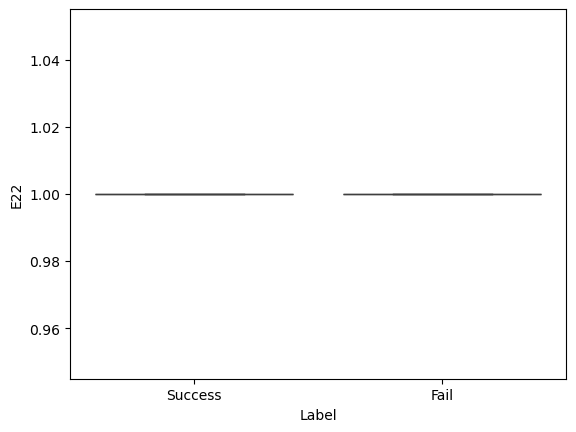

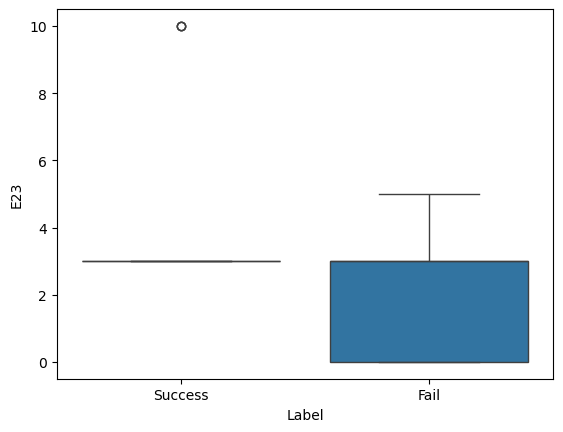

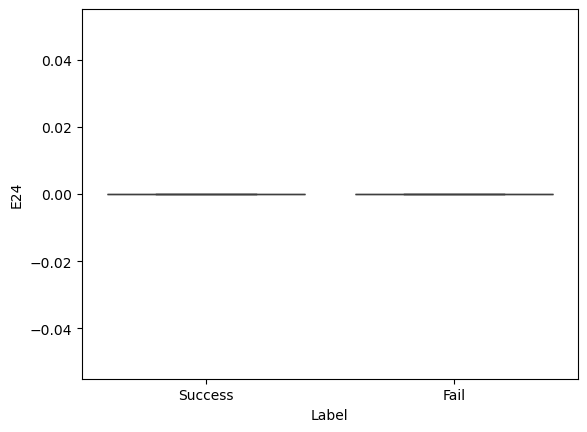

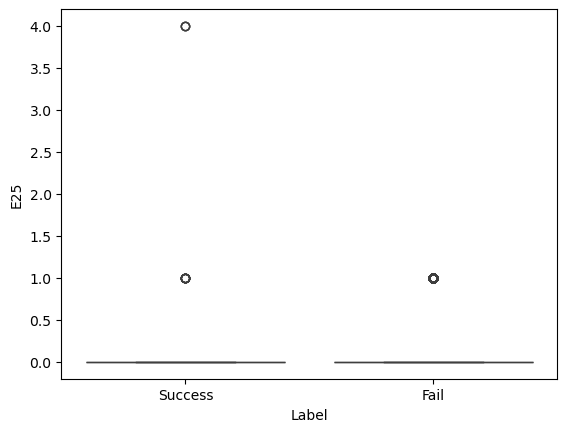

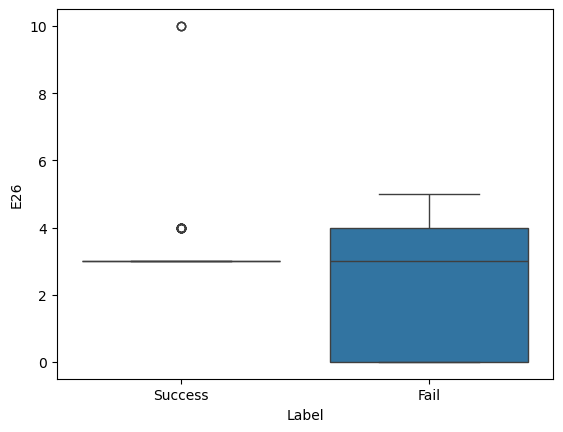

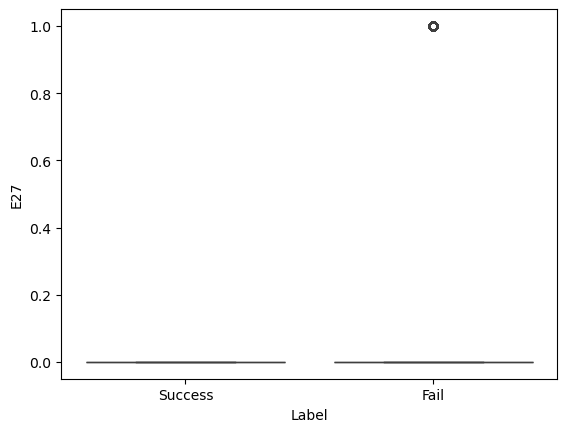

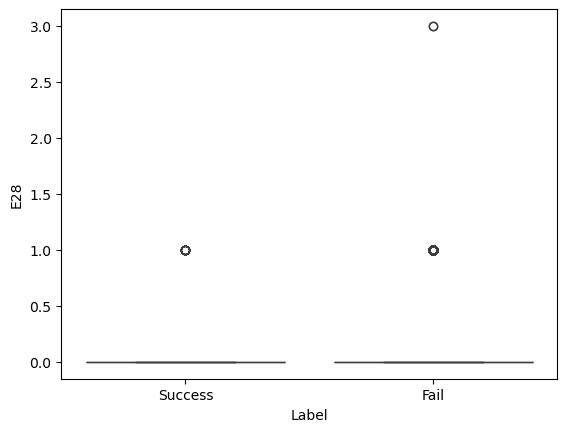

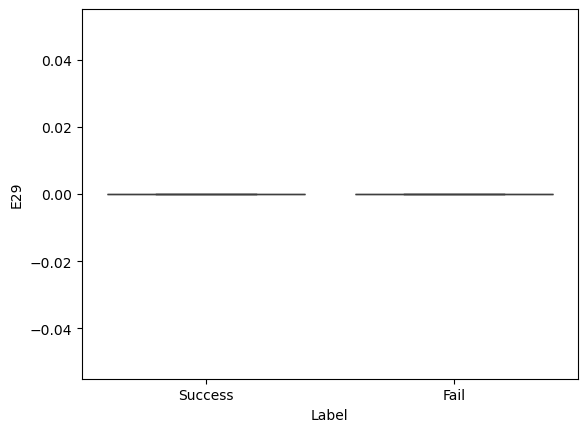

In [13]:
for col in v.drop(['BlockId','Label','Type'], axis=1).columns:
    sns.boxplot(data=v,x='Label',y=col)
    plt.show()

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


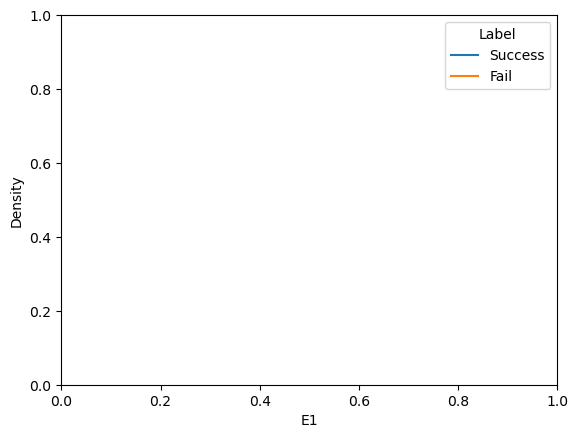

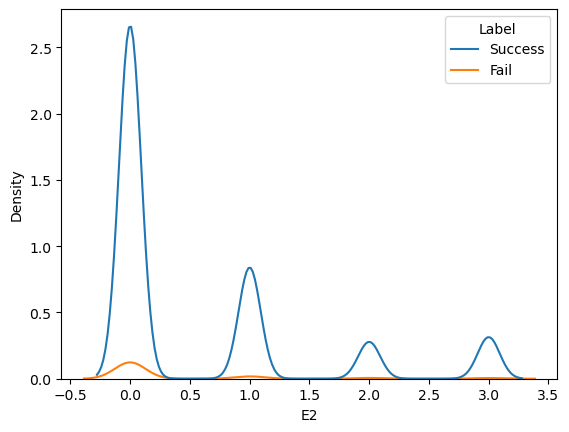

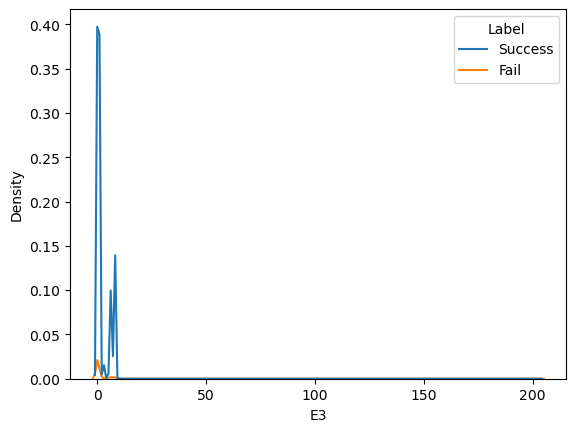

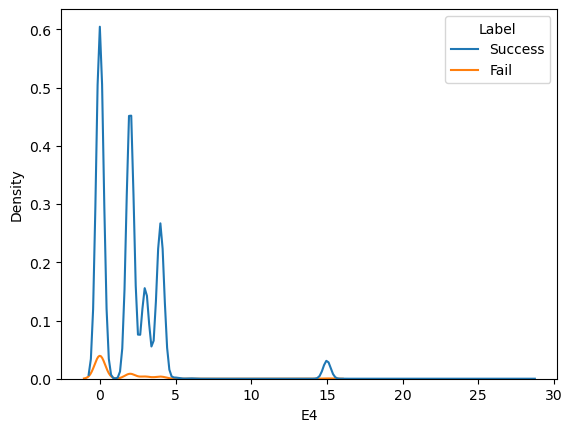

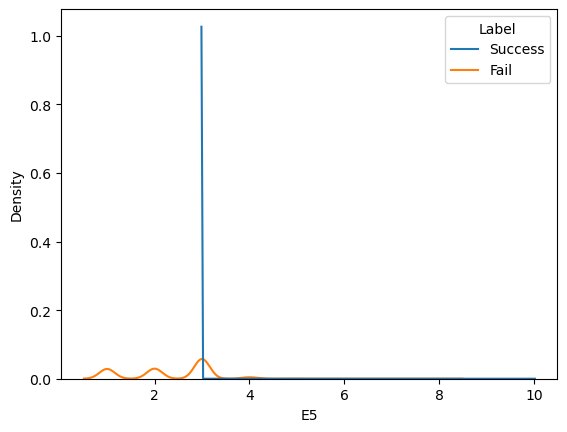

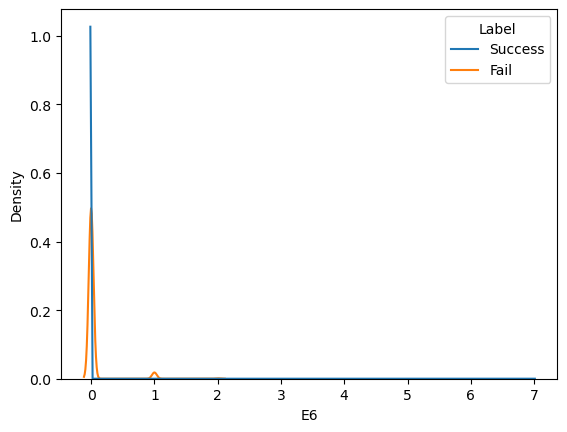

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


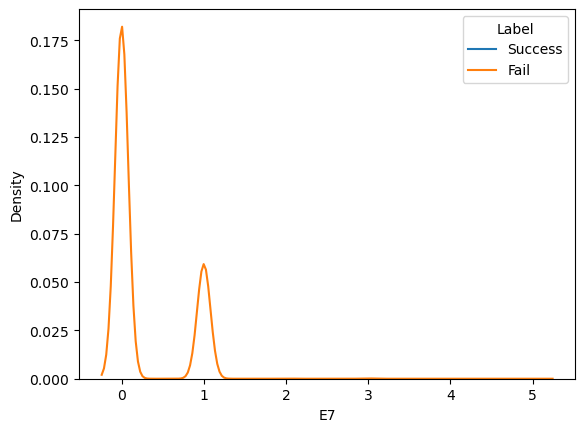

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


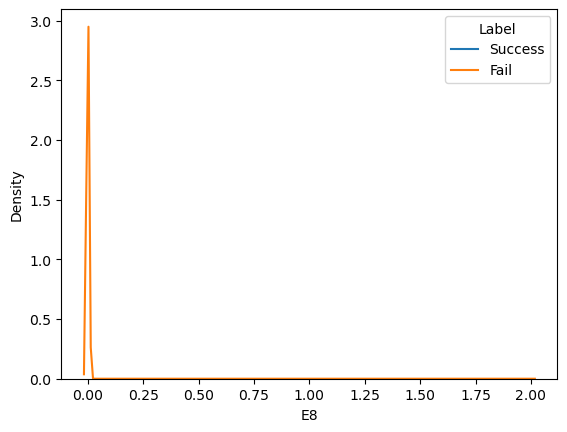

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


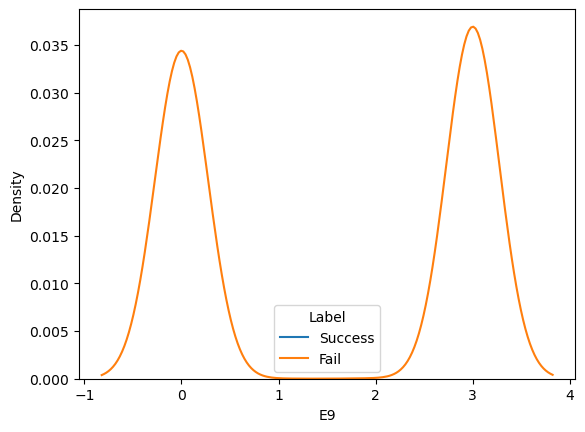

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


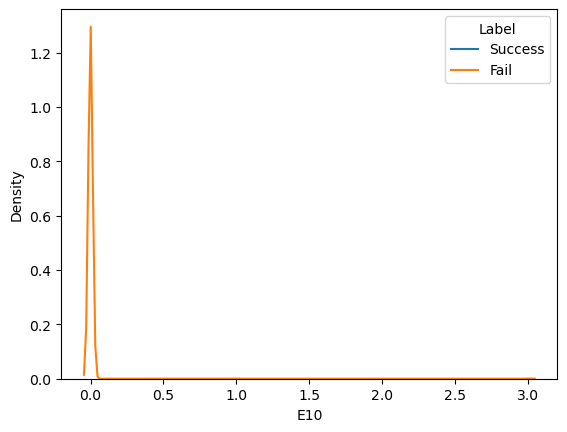

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


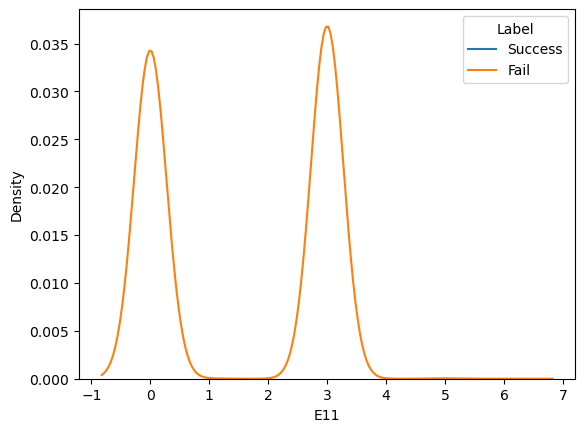

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


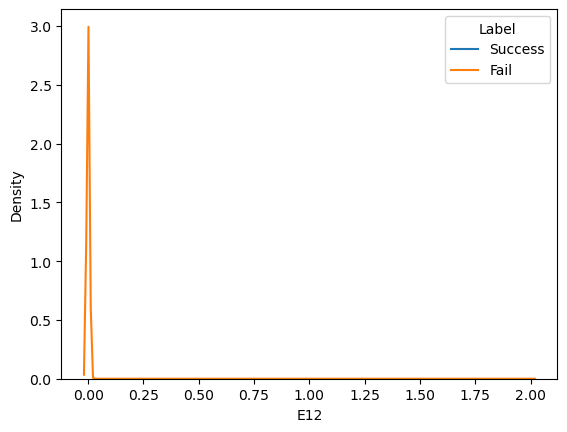

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


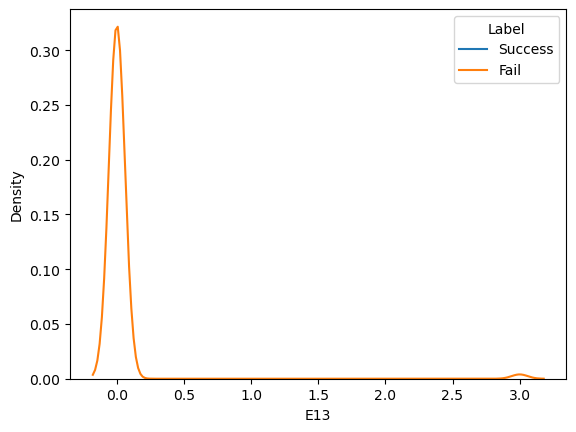

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


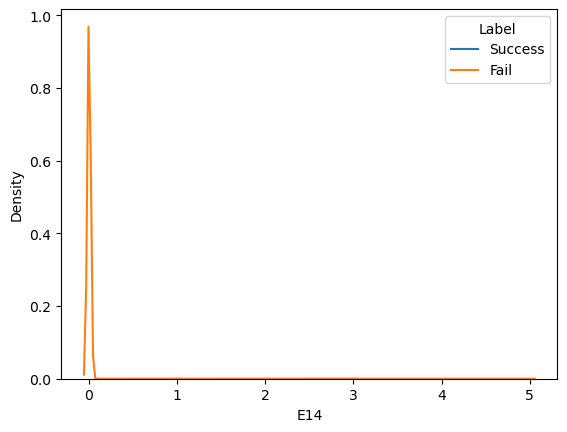

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


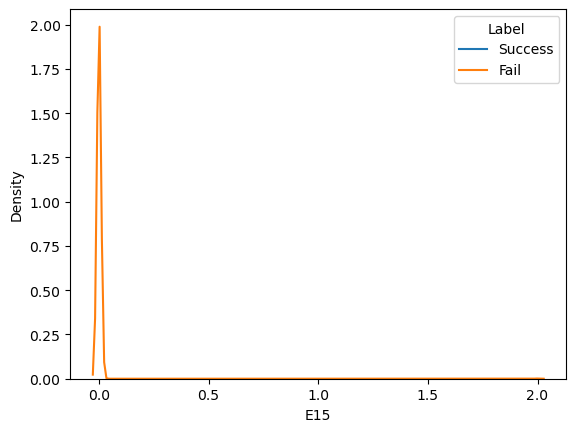

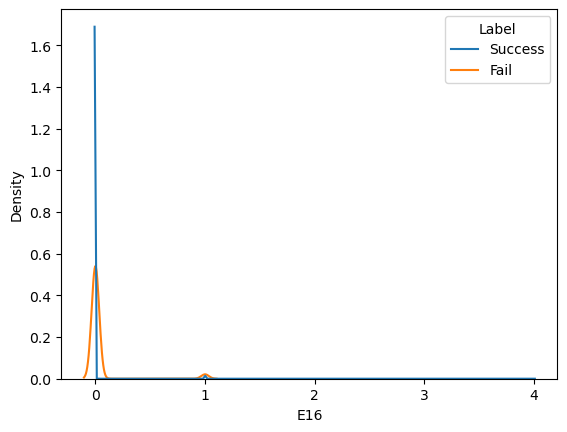

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


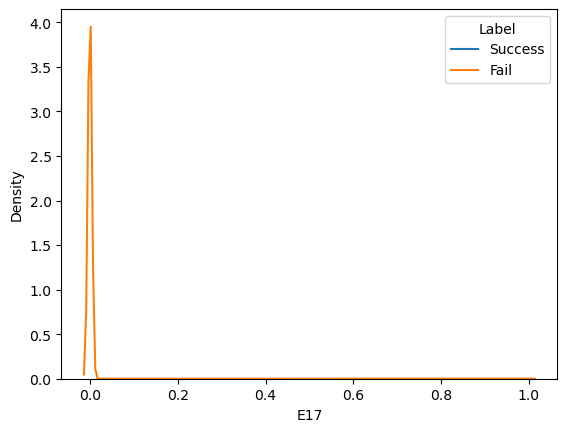

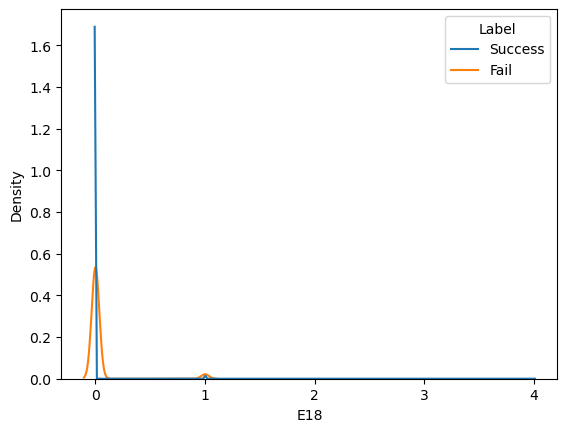

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


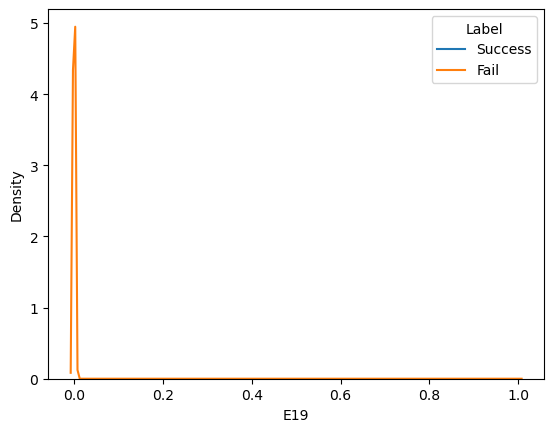

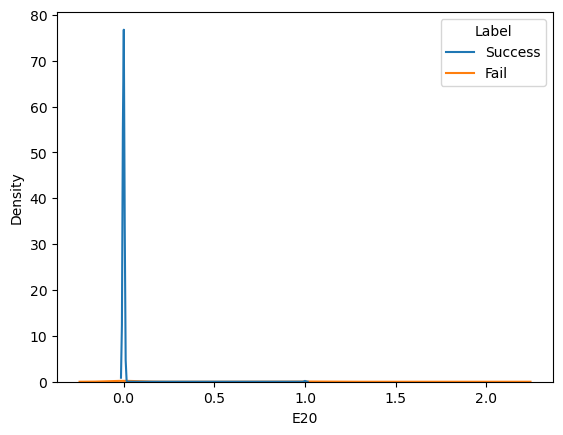

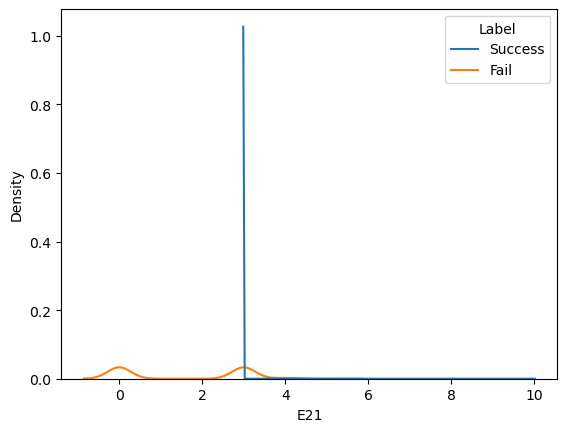

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


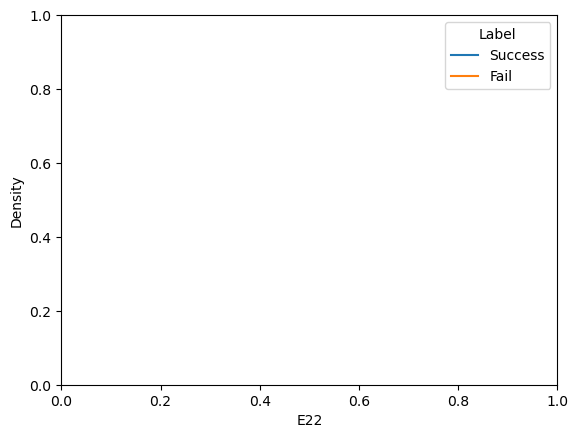

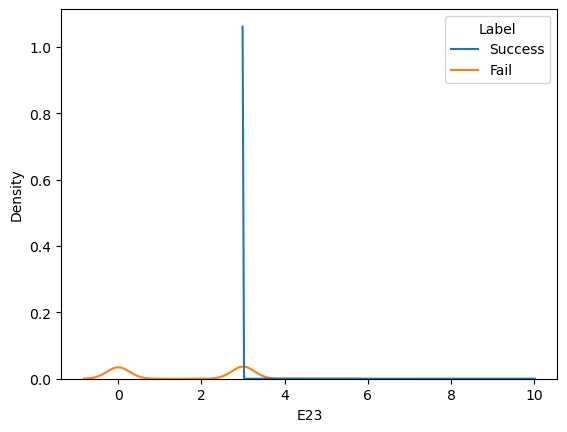

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


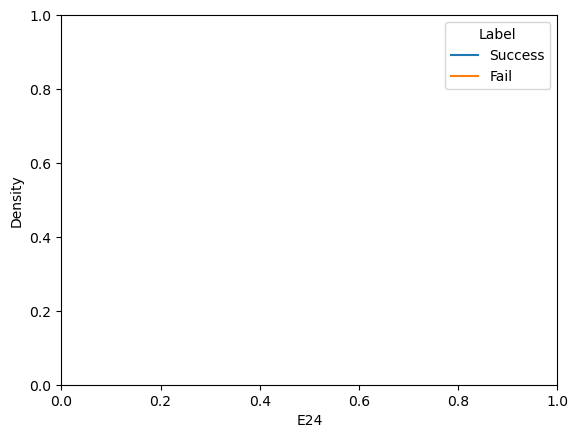

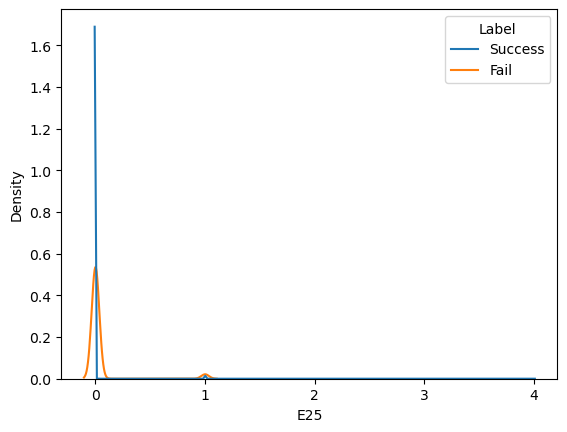

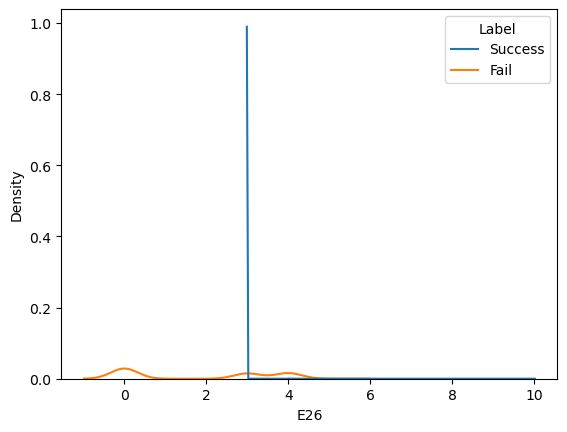

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


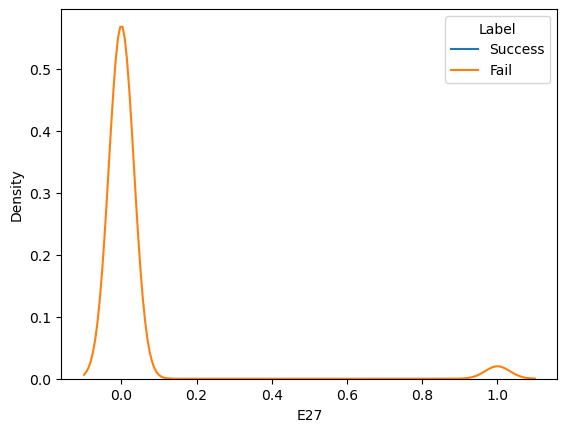

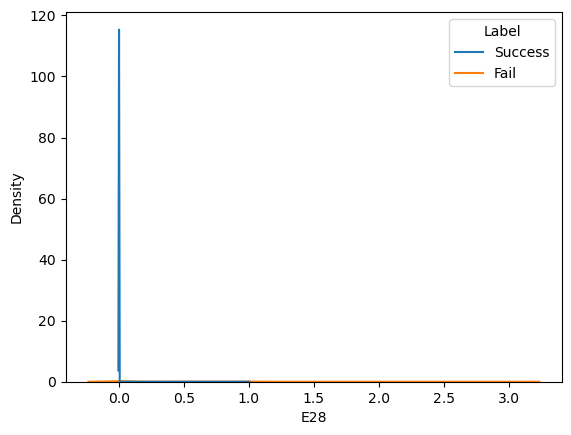

C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_50448\3647123090.py:2: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=v,x=col,hue='Label')


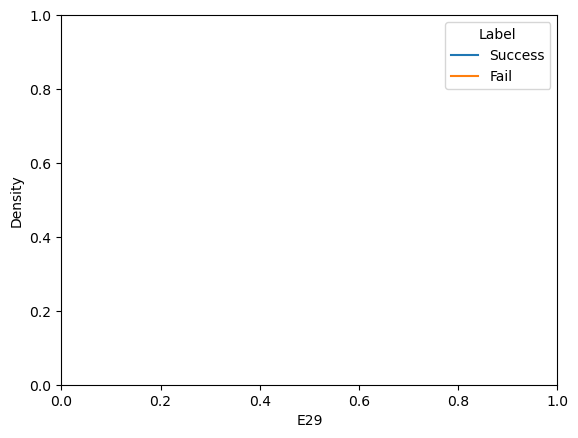

In [14]:
for col in v.drop(['BlockId','Label','Type'], axis=1).columns:
    sns.kdeplot(data=v,x=col,hue='Label')
    plt.show()

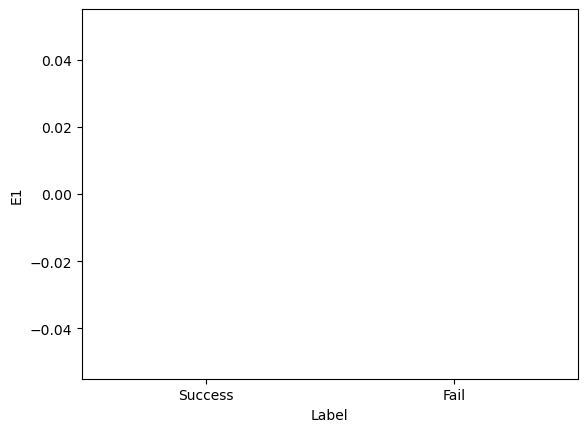

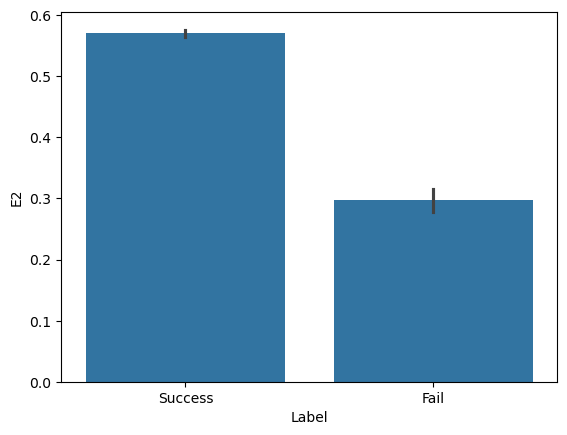

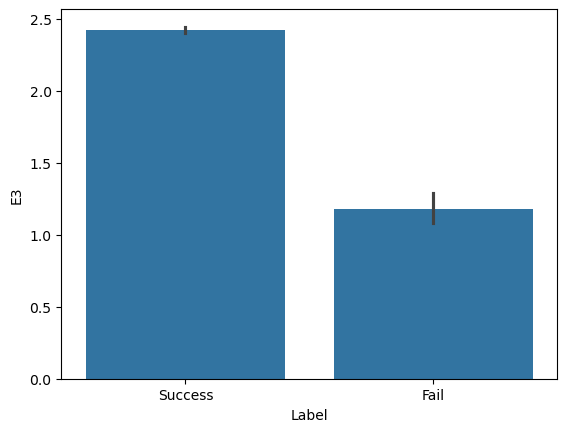

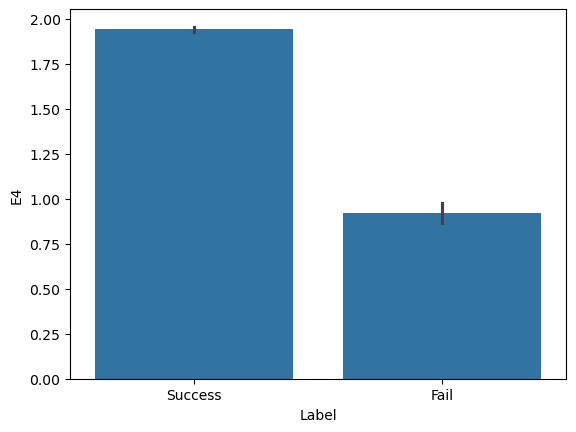

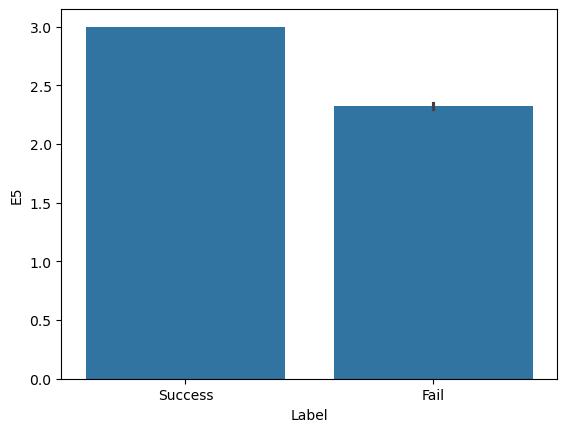

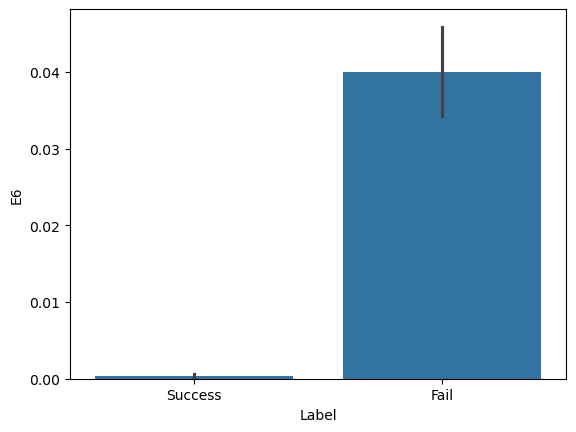

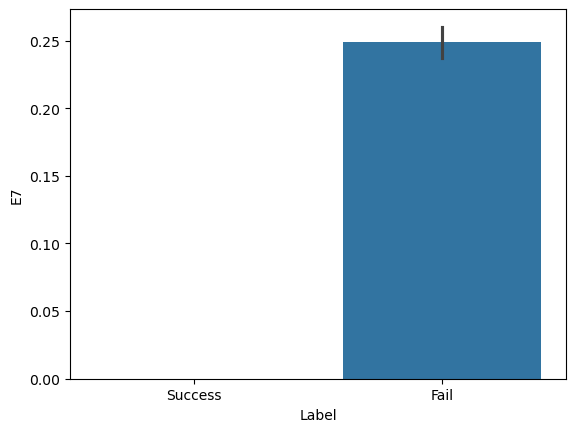

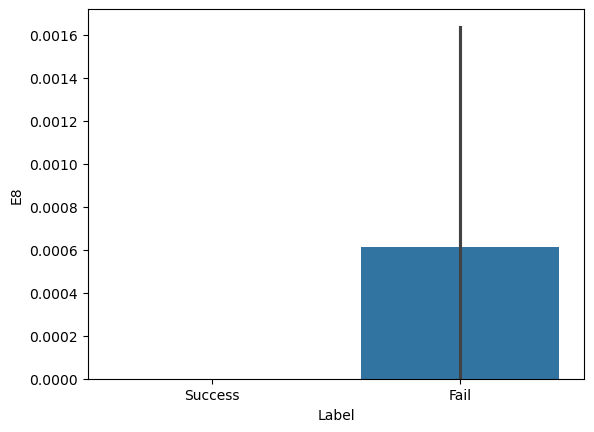

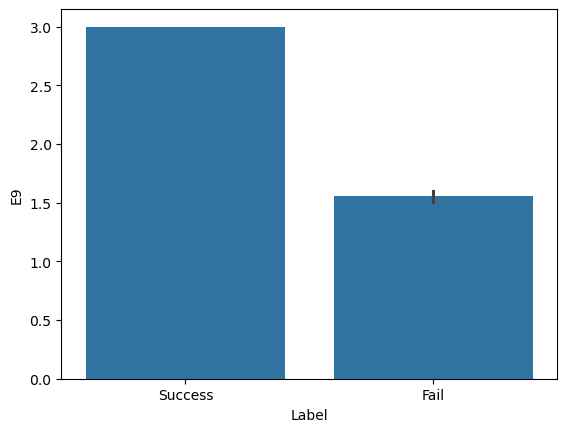

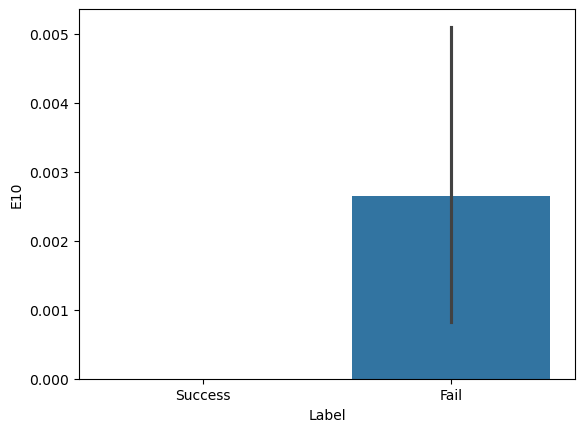

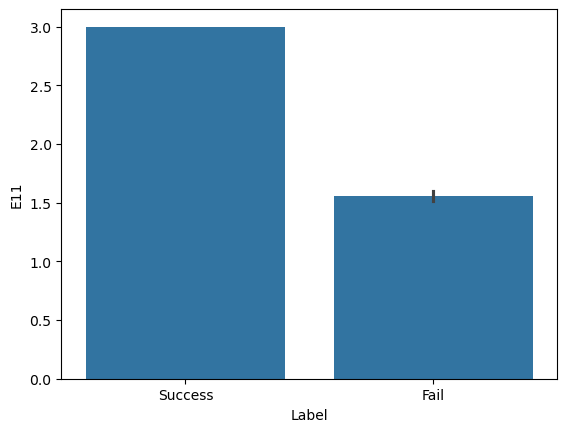

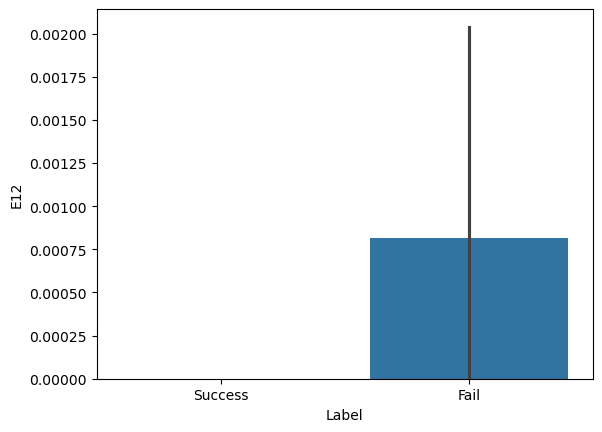

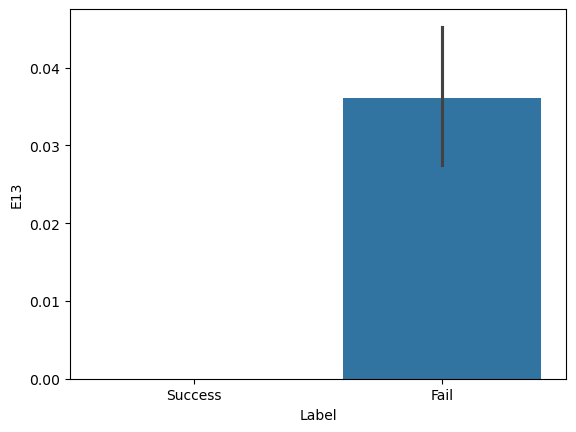

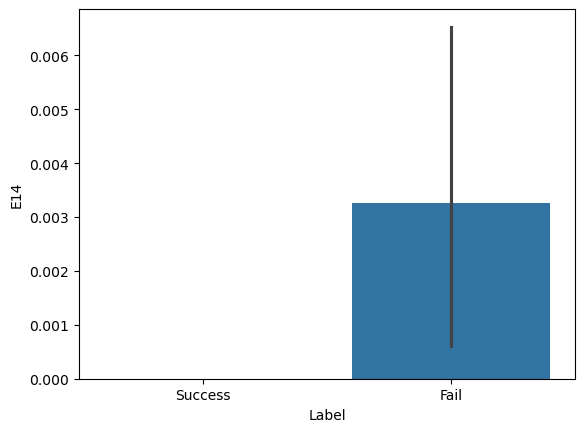

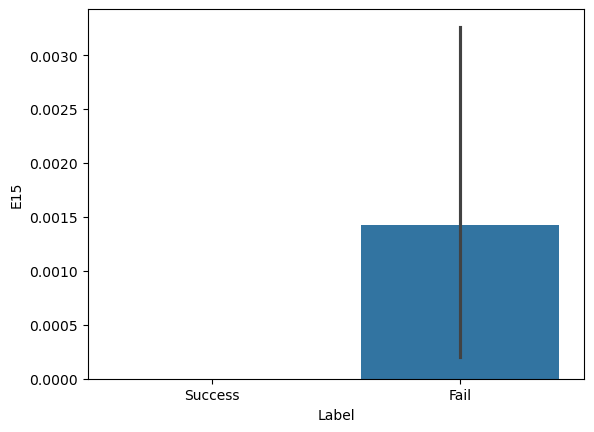

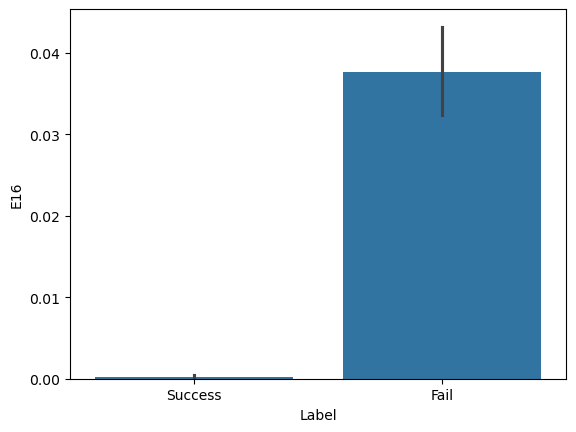

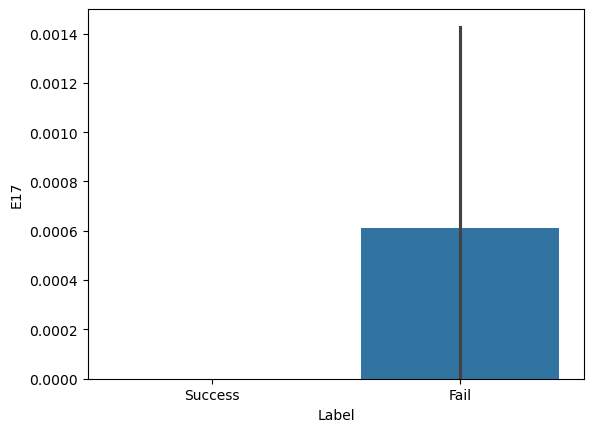

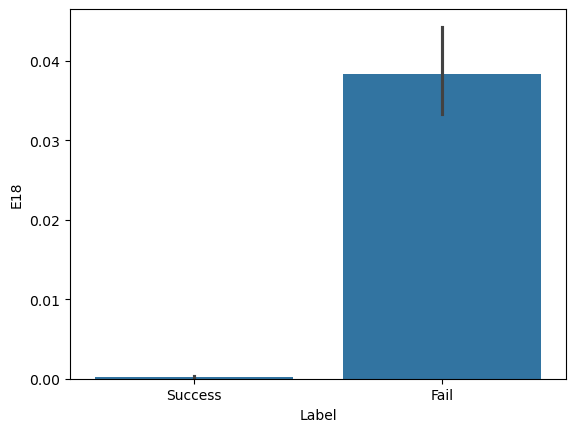

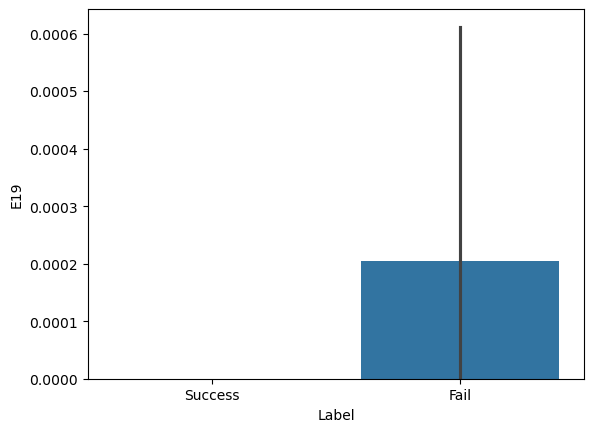

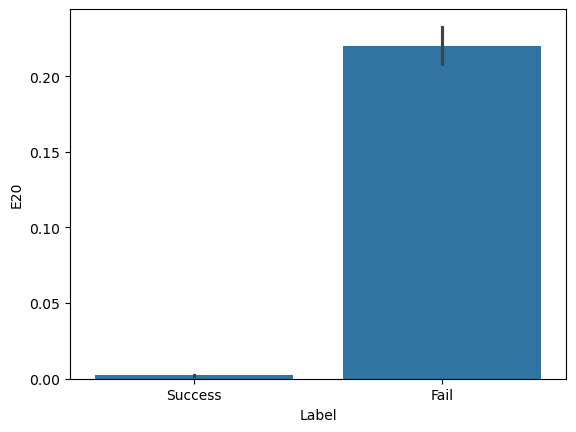

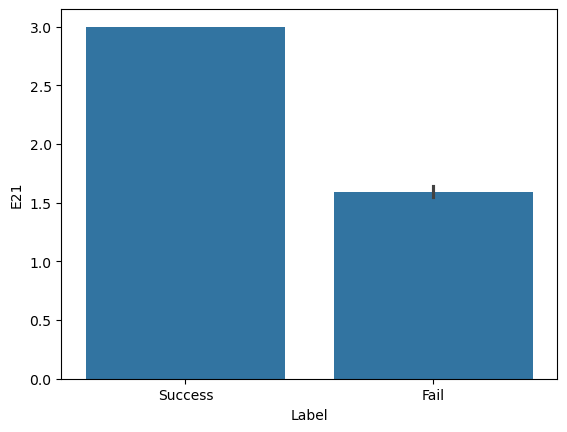

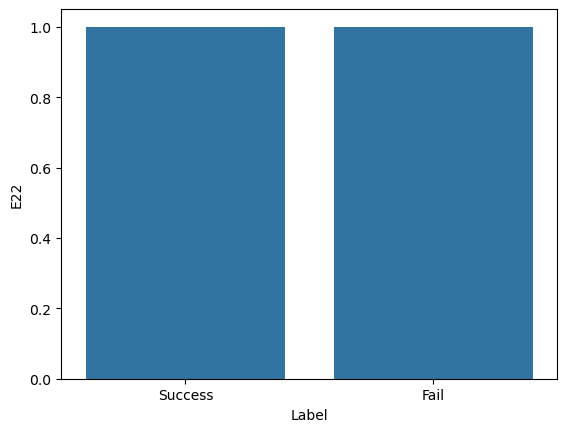

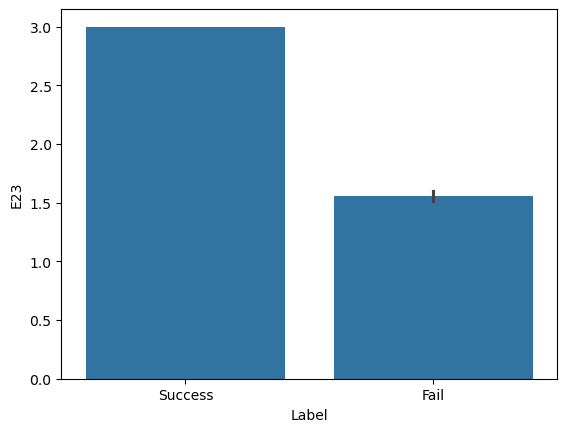

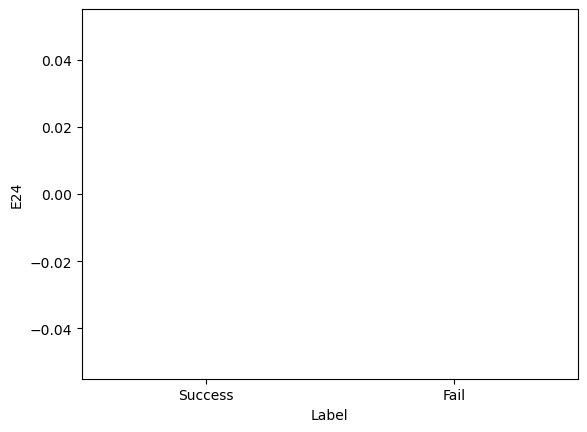

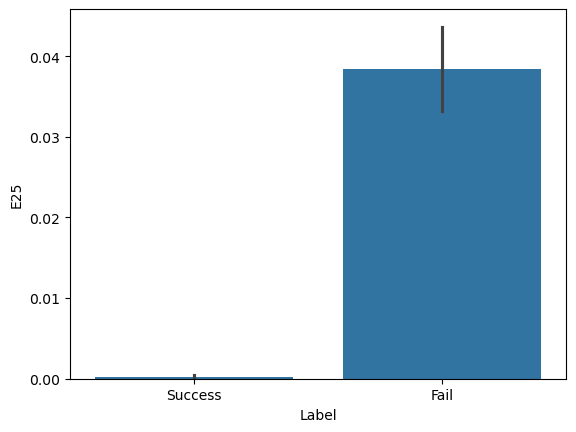

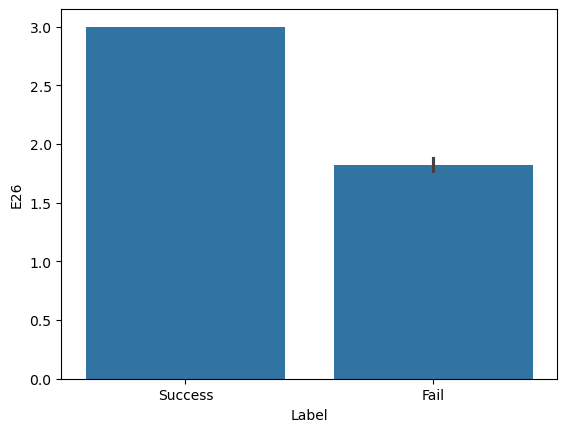

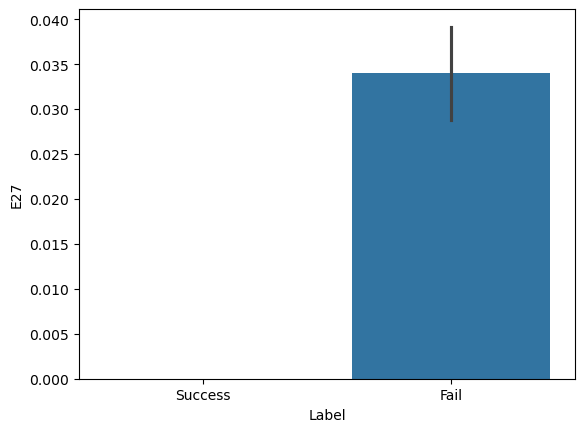

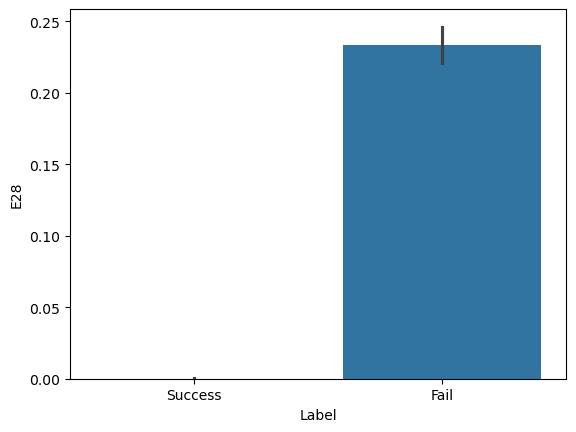

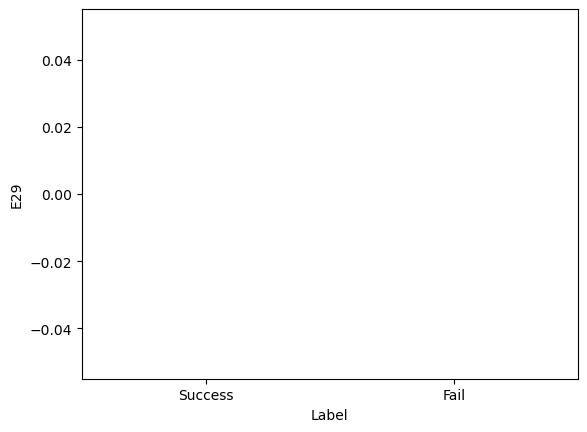

In [15]:
for col in v.drop(['BlockId','Label','Type'], axis=1).columns:
    sns.barplot(data=v,x='Label',y=col)
    plt.show()

## 3. Training the model

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report



In [17]:
x = occ_df.drop(['BlockId','Label','Type'],axis=1)
y = occ_df.Label

xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=33)

scaled = StandardScaler()
# xtrain = scaled.fit_transform(xtrain)

In [18]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(xtrain,ytrain)

D:\Y2S2\AI_IN_CYBER\anaconda\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced')

In [19]:
predict = logmodel.predict(xtest)

## 3.1 Logistic Regression Model Performance

In [20]:
print('Confusion Matrix')
print(confusion_matrix(ytest,predict))
print('Classification Report')
print(classification_report(ytest,predict))

Confusion Matrix
[[  3397      5]
 [   129 111482]]
Classification Report
              precision    recall  f1-score   support

        Fail       0.96      1.00      0.98      3402
     Success       1.00      1.00      1.00    111611

    accuracy                           1.00    115013
   macro avg       0.98      1.00      0.99    115013
weighted avg       1.00      1.00      1.00    115013



## 3.2 Decision Tree Model Performance

In [21]:
tree = DecisionTreeClassifier(max_depth=5)
tree.fit(xtrain, ytrain)
y_pred_tree = tree.predict(xtest)

print(confusion_matrix(ytest, y_pred_tree))
print(classification_report(ytest, y_pred_tree))

[[  3387     15]
 [    18 111593]]
              precision    recall  f1-score   support

        Fail       0.99      1.00      1.00      3402
     Success       1.00      1.00      1.00    111611

    accuracy                           1.00    115013
   macro avg       1.00      1.00      1.00    115013
weighted avg       1.00      1.00      1.00    115013



## 4.HDFS V2 logs

In [5]:
import os

hdfsv2_path = './HDFS_v2_node_logs'
hdfsv2_csv_store_path = hdfsv2_path + '/hdfsv2_csv'

hdfsv2_files = [a for a in os.listdir(hdfsv2_path) if '.log' in a]


#### 4.1 Reading the raw log to prepare transformation step to dataframe

In [9]:
with open(hdfsv2_path+'/'+hdfsv2_files[9], 'r') as hd:
    h_v2_raw = hd.readlines()[10:]

for k in h_v2_raw[:30]:
    print(k)

2015-08-21 11:16:04,290 INFO org.apache.hadoop.hdfs.server.datanode.DataNode: registered UNIX signal handlers for [TERM, HUP, INT]

2015-08-21 11:16:05,751 INFO org.apache.hadoop.metrics2.impl.MetricsConfig: loaded properties from hadoop-metrics2.properties

2015-08-21 11:16:05,858 INFO org.apache.hadoop.metrics2.impl.MetricsSystemImpl: Scheduled snapshot period at 10 second(s).

2015-08-21 11:16:05,858 INFO org.apache.hadoop.metrics2.impl.MetricsSystemImpl: DataNode metrics system started

2015-08-21 11:16:05,865 INFO org.apache.hadoop.hdfs.server.datanode.BlockScanner: Initialized block scanner with targetBytesPerSec 1048576

2015-08-21 11:16:05,867 INFO org.apache.hadoop.hdfs.server.datanode.DataNode: Configured hostname is mesos-slave-11

2015-08-21 11:16:05,878 INFO org.apache.hadoop.hdfs.server.datanode.DataNode: Starting DataNode with maxLockedMemory = 0

2015-08-21 11:16:05,911 INFO org.apache.hadoop.hdfs.server.datanode.DataNode: Opened streaming server at /0.0.0.0:50010

2015

#### 4.2 Parsing and seperating the different columns using Regex

In [13]:
df_raw = pd.DataFrame(h_v2_raw, columns=['raw_log'])

regex_pattern = r'^(?P<Date>\d{4}-\d{2}-\d{2})\s+(?P<Time>\d{2}:\d{2}:\d{2},\d{3})\s+(?P<Level>[A-Z]+)\s+(?P<Component>[\w\.]+):\s+(?P<Content>.*)$'

df_base = df_raw['raw_log'].str.extract(regex_pattern)

df_base.head()

,Date,Time,Level,Component,Content
0,2015-08-21,"11:16:04,290",INFO,org.apache.hadoop.hdfs.server.datanode.DataNode,"registered UNIX signal handlers for [TERM, HUP..."
1,2015-08-21,"11:16:05,751",INFO,org.apache.hadoop.metrics2.impl.MetricsConfig,loaded properties from hadoop-metrics2.properties
2,2015-08-21,"11:16:05,858",INFO,org.apache.hadoop.metrics2.impl.MetricsSystemImpl,Scheduled snapshot period at 10 second(s).
3,2015-08-21,"11:16:05,858",INFO,org.apache.hadoop.metrics2.impl.MetricsSystemImpl,DataNode metrics system started
4,2015-08-21,"11:16:05,865",INFO,org.apache.hadoop.hdfs.server.datanode.BlockSc...,Initialized block scanner with targetBytesPerS...


#### 4.3 Exploring the data

In [16]:
df_base.Level.value_counts()

Level
INFO     1241251
WARN       18894
ERROR          6
Name: count, dtype: int64

In [19]:
df_base.Component.value_counts()

Component
org.apache.hadoop.hdfs.server.datanode.DataNode                                    482039
org.apache.hadoop.hdfs.server.datanode.fsdataset.impl.FsDatasetAsyncDiskService    394444
org.apache.hadoop.hdfs.server.datanode.DataNode.clienttrace                        196298
org.apache.hadoop.ipc.Client                                                       183193
org.apache.hadoop.hdfs.server.datanode.DirectoryScanner                              2417
org.apache.hadoop.hdfs.server.datanode.VolumeScanner                                 1475
org.apache.hadoop.hdfs.server.datanode.fsdataset.impl.FsDatasetImpl                    83
org.apache.hadoop.hdfs.server.common.Storage                                           42
org.apache.hadoop.http.HttpServer2                                                     40
org.mortbay.log                                                                        24
org.apache.hadoop.ipc.Server                                                           24


In [23]:

df_base.Content.nunique()

1052465

In [26]:
df_base.shape

(1757396, 5)

#### 4.4 Checking if previous eventID format can be used

In [52]:
print(df_base.isnull().sum())

df_base = df_base.dropna()

print(df_base.isnull().sum())


Date         0
Time         0
Level        0
Component    0
Content      0
dtype: int64
Date         0
Time         0
Level        0
Component    0
Content      0
dtype: int64


In [54]:
import re

combined_regex_str = "|".join([f"(?P<{eid}>{pat})" for eid, pat in zip(eid_df['EventId'], eid_df['regex_pattern'])])
combined_pattern = re.compile(combined_regex_str)

# 2. Define a function to extract the name of the group that matched
def get_event_id_fast(content):
    
    match = combined_pattern.search(content)
        
    if match:
        # lastgroup returns the name of the named group that participated in the match
        return match.lastgroup
    return None

# 3. Apply to the dataframe

df_base['EventId'] = df_base['Content'].apply(get_event_id_fast)


re.compile('(?P<E1>(.*?)Adding an already existing block(.*?))|(?P<E2>(.*?)Verification succeeded for(.*?))|(?P<E3>(.*?)Served block(.*?)to(.*?))|(?P<E4>(.*?)Got exception while serving(.*?)to(.*?))|(?P<E5>(.*?))


#### 4.5 Extracting unique events from the logs and trying to create a new event log system

In [36]:
# pd.set_option('display.max_colwidth', 500)
df_base.Content.head(20)

0                                                                            registered UNIX signal handlers for [TERM, HUP, INT]
1                                                                               loaded properties from hadoop-metrics2.properties
2                                                                                      Scheduled snapshot period at 10 second(s).
3                                                                                                 DataNode metrics system started
4                                                                        Initialized block scanner with targetBytesPerSec 1048576
5                                                                                           Configured hostname is mesos-slave-11
6                                                                                      Starting DataNode with maxLockedMemory = 0
7                                                                                       Op

In [55]:
df_base.head()

,Date,Time,Level,Component,Content,EventId
0,2015-08-21,"11:16:04,290",INFO,org.apache.hadoop.hdfs.server.datanode.DataNode,"registered UNIX signal handlers for [TERM, HUP, INT]",None
1,2015-08-21,"11:16:05,751",INFO,org.apache.hadoop.metrics2.impl.MetricsConfig,loaded properties from hadoop-metrics2.properties,None
2,2015-08-21,"11:16:05,858",INFO,org.apache.hadoop.metrics2.impl.MetricsSystemImpl,Scheduled snapshot period at 10 second(s).,None
3,2015-08-21,"11:16:05,858",INFO,org.apache.hadoop.metrics2.impl.MetricsSystemImpl,DataNode metrics system started,None
4,2015-08-21,"11:16:05,865",INFO,org.apache.hadoop.hdfs.server.datanode.BlockScanner,Initialized block scanner with targetBytesPerSec 1048576,None


In [64]:
df_base.Content.head(100000).to_csv('rule_check.csv')

## 5 Cleaning HDFS 2.0 logs

### 5.1 Identifying unique logs

In [68]:
unknown_logs = df_base['Content'].unique()
print(f"Number of unique unknown log patterns: {len(unknown_logs)}")

Number of unique unknown log patterns: 1052465


In [79]:
unknown_logs[:100]

array(['registered UNIX signal handlers for [TERM, HUP, INT]',
       'loaded properties from hadoop-metrics2.properties',
       'Scheduled snapshot period at 10 second(s).',
       'DataNode metrics system started',
       'Initialized block scanner with targetBytesPerSec 1048576',
       'Configured hostname is mesos-slave-11',
       'Starting DataNode with maxLockedMemory = 0',
       'Opened streaming server at /0.0.0.0:50010',
       'Balancing bandwith is 1048576 bytes/s',
       'Number threads for balancing is 5',
       'Logging to org.slf4j.impl.Log4jLoggerAdapter(org.mortbay.log) via org.mortbay.log.Slf4jLog',
       'Unable to initialize FileSignerSecretProvider, falling back to use random secrets.',
       'Http request log for http.requests.datanode is not defined',
       "Added global filter 'safety' (class=org.apache.hadoop.http.HttpServer2$QuotingInputFilter)",
       'Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFi

### 5.2 Using regex to create a template mask

In [82]:

def get_template_mask(content):
    
    if not isinstance(content, str): return None
        
    # 1. Replace Block IDs
    mask = re.sub(r'blk_-?\d+', '<BLOCK_ID>', content)
    
    # 2. Replace IP addresses/numbers
    mask = re.sub(r'\d+', '<NUM>', mask)
    
    # 3. Replace file paths or URLs
    mask = re.sub(r'/[a-zA-Z0-9/._-]+', '<PATH>', mask)
    return mask

# Apply masking to unknown logs
unknown_df = pd.DataFrame(unknown_logs, columns=['Content'])
unknown_df['Template_Mask'] = unknown_df['Content'].apply(get_template_mask)




C:\Users\koh bock chow\AppData\Local\Temp\ipykernel_33312\4186687139.py:20: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  print(unknown_df['Template_Mask'].value_counts()[0])


218136
                                                    Event
0    registered UNIX signal handlers for [TERM, HUP, INT]
1   loaded properties from hadoop-metrics<NUM>.properties
2           Scheduled snapshot period at <NUM> second(s).
3                         DataNode metrics system started
4  Initialized block scanner with targetBytesPerSec <NUM>


In [97]:

new_potential_events = pd.DataFrame(unknown_df['Template_Mask'].value_counts())
new_potential_events = new_potential_events.reset_index()
new_potential_events.columns = ['Event', 'Count']


print(new_potential_events.tail())

                                                                                                                                                                                                                                                                                                                      Event  \
2335                                                                                                                                                                                              Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter) to context static   
2336                                                                                                                                                                                                Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter) to context logs   
2337                                       

In [70]:
def get_signature(content):
    
    return " ".join(str(content).split()[:4])

unknown_df['Signature'] = df_base['Content'].apply(get_signature)
discovered_events = unknown_df.groupby('Signature')['Content'].first()

discovered_events.head()

Signature
Acknowledging ACTIVE Namenode Block                                                                        VolumeScanner(/tmp/hadoop-hdfs/dfs/data, DS-9e42e490-1f2a-4aeb-923b-5fdb17af061f): no suitable block pools found to scan.  Waiting 1814399871 ms.
Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter)                          Added filter static_user_filter (class=org.apache.hadoop.http.lib.StaticUserWebFilter$StaticUserFilter) to context datanode
Added global filter 'safety'                                                                                                                                      Added global filter 'safety' (class=org.apache.hadoop.http.HttpServer2$QuotingInputFilter)
Added new volume: DS-195b1adf-7b35-4755-810b-79326b3c20e7                                                                   PacketResponder: BP-108841162-10.10.34.11-1440074360971:blk_1073744157_3333, type=LAST_IN_PIPELINE, downstr

## 5. HDFSv3 logs

In [1]:
import os

hdfs3_folder = './HDFS_v3_preprocessed'

hdfs3_files = [a for a in os.listdir(hdfs3_folder) if '.json' in a or '.csv' in a]

for a in hdfs3_files:
    print(a)

eventId.json
failure_taskId.json
failure_trace.csv
normal_taskId.json
normal_trace.csv
rowNumberResult.csv


In [4]:
# initalising the dataframes
hdfs3_dfs = []
for a in hdfs3_files:
    if '.json' in a:
        hdfs3_dfs.append(pd.read_json(hdfs3_folder+'/'+a))
    elif '.csv' in a:
        hdfs3_dfs.append(pd.read_csv(hdfs3_folder+'/'+a))

In [5]:
# exploring the datasets

for b,e in enumerate(hdfs3_dfs):
    print(b, hdfs3_files[b])
    print(e.head())

0 eventId.json
                                                   0  1
0  getFileInfo+success: return(ow[class=class org...  0
1  RPC:getFileInfo+success: return(ow[class=class...  1
2  getBlockLocations+success: return(ow[class=cla...  2
3  RPC:getBlockLocations+success: return(ow[class...  3
4    bestNode+success: chosen bestnode = in nodes =   4
1 failure_taskId.json
                  0  1
0  B076E6516B275ABB  0
1  A8DFB1AFB3AF3645  1
2  E5E74A5B2CB7ED61  2
3  07484C540CA975EF  3
4  4FBE4C9F5C6D353D  4
2 failure_trace.csv
             TaskID  \
0  A3D866C198394B6C   
1  8B454C795004383B   
2  E98D8C43C4DAB01E   
3  F92E1122370550F0   
4  DA7494446C39DF7A   

   getFileInfo+success: return(ow[class=class org.apache.hadoop.hdfs.protocol.hdfsfilestatus  \
0                                                4.0                                           
1                                                4.0                                           
2                                         

In [6]:
# exploring the descriptions of the datasets
for b,e in enumerate(hdfs3_dfs):
    print(b, hdfs3_files[b])
    print('Size of dataset:',e.shape)
    print('Database describe:', e.describe())
    print('Database info:', e.info())
    print('Empty values:', e.isna().sum())

0 eventId.json
Size of dataset: (2155, 2)
Database describe:                  1
count  2155.000000
mean   1077.000000
std     622.239236
min       0.000000
25%     538.500000
50%    1077.000000
75%    1615.500000
max    2154.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2155 entries, 0 to 2154
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       2155 non-null   object
 1   1       2155 non-null   int64 
dtypes: int64(1), object(1)
memory usage: 33.8+ KB
Database info: None
Empty values: 0    0
1    0
dtype: int64
1 failure_taskId.json
Size of dataset: (143556, 2)
Database describe:                    1
count  143556.000000
mean    71777.500000
std     41441.191959
min         0.000000
25%     35888.750000
50%     71777.500000
75%    107666.250000
max    143555.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 143556 entries, 0 to 143555
Data columns (total 2 columns):
 #   Column  Non-Null Count   Dtype 


In [7]:
# exploring the shape of the data

print('Dataframe shape:')

for b,e in enumerate(hdfs3_dfs):
    print(b,hdfs3_files[b],e.shape)

Dataframe shape:
0 eventId.json (2155, 2)
1 failure_taskId.json (143556, 2)
2 failure_trace.csv (29817, 2156)
3 normal_taskId.json (226767, 2)
4 normal_trace.csv (226767, 2156)
5 rowNumberResult.csv (363, 5)


Considering that the number of rows matched the event ID in failure_trace.csv and normal_trace.csv, we can further explore those files

In [31]:
hdfs3_dfs[0].head()

,0,1
0,getFileInfo+success: return(ow[class=class org...,0
1,RPC:getFileInfo+success: return(ow[class=class...,1
2,getBlockLocations+success: return(ow[class=cla...,2
3,RPC:getBlockLocations+success: return(ow[class...,3
4,bestNode+success: chosen bestnode = in nodes =,4


In [8]:
# hdfs3_dfs[4].columns = ['TaskID'] + hdfs3_dfs[0]['1'].tolist()
mapping_dict = dict(zip(hdfs3_dfs[0].iloc[:, 0], hdfs3_dfs[0].iloc[:, 1]))

hdfs3_dfs[4].rename(columns=mapping_dict, inplace=True)

In [9]:
print(hdfs3_dfs[4].head())
print(hdfs3_dfs[4].shape)

             TaskID    0    1    2    3    4    5    6    7    8  ...  2145  \
0  C47C9A2D664ACF66  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
1  2525398BEF2D756B  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
2  8F758E6FAF80F711  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
3  A44931922B99D07C  2.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   
4  5B7F82CA0EEB7A1A  2.0  2.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...   0.0   

   2146  2147  2148  2149  2150  2151  2152  2153  2154  
0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
1   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
2   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
3   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  
4   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0   0.0  

[5 rows x 2156 columns]
(226767, 2156)


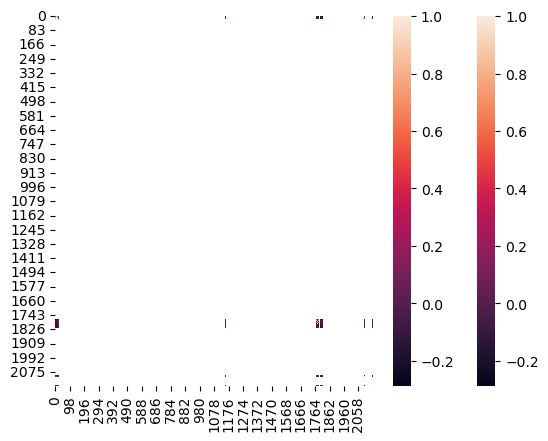

In [59]:
sns.heatmap(hdfs3_dfs[4].corr(numeric_only=True))
plt.show()

In [60]:
plt.show(

In [10]:
# no rows or values that are empty
hdfs3_dfs[4].isna().sum().sum()

np.int64(0)

In [11]:
# formatting the failed events and normal events

hdfs3_dfs[2].rename(columns=mapping_dict, inplace=True)
hdfs3_dfs[2]['Rate'] = 1

hdfs3_dfs[4]['Rate'] = 0

total_logs = pd.concat([hdfs3_dfs[2], hdfs3_dfs[4]])

In [13]:
print('Log Size:',total_logs.shape)
# print('Describe:',total_logs.describe()) # Unable to due to memory constraints
print('Info:',total_logs.info())
print('Empty cells:',total_logs.isna().sum())


Log Size: (256584, 2157)
<class 'pandas.core.frame.DataFrame'>
Index: 256584 entries, 0 to 226766
Columns: 2157 entries, TaskID to Rate
dtypes: float64(2155), int64(1), object(1)
memory usage: 4.1+ GB
Info: None
Empty cells: TaskID    0
0         0
1         0
2         0
3         0
         ..
2151      0
2152      0
2153      0
2154      0
Rate      0
Length: 2157, dtype: int64


## 6. Training models on H

In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report

In [18]:
# declaring some var
scaled = StandardScaler()
tree = DecisionTreeClassifier(max_depth=5)

train_df = total_logs

# splitting data
x = train_df.drop(['TaskID','Rate'],axis=1)
y = train_df.Rate
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.2,random_state=33)

# Training data
tree.fit(xtrain, ytrain)
y_pred_tree = tree.predict(xtest)

# Testing data
print(confusion_matrix(ytest, y_pred_tree))
print(classification_report(ytest, y_pred_tree))

[[45394     2]
 [  428  5493]]
              precision    recall  f1-score   support

           0       0.99      1.00      1.00     45396
           1       1.00      0.93      0.96      5921

    accuracy                           0.99     51317
   macro avg       1.00      0.96      0.98     51317
weighted avg       0.99      0.99      0.99     51317



In [19]:
logmodel = LogisticRegression(class_weight='balanced')
logmodel.fit(xtrain,ytrain)

predictc = logmodel.predict(xtest)

In [20]:
print('Confusion Matrix')
print(confusion_matrix(ytest,predictc))
print('Classification Report')
print(classification_report(ytest,predictc))

Confusion Matrix
[[45391     5]
 [    0  5921]]
Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     45396
           1       1.00      1.00      1.00      5921

    accuracy                           1.00     51317
   macro avg       1.00      1.00      1.00     51317
weighted avg       1.00      1.00      1.00     51317

